# Laboratorio 2

##### Javier Valle 20159
##### Mario de León 19026

## Haciendo análisis exploratorio.

In [119]:
# Imports necesarios.
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
import re
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

### Inciso 1: Análisis exploratorio

In [120]:
# Abriendo el csv.
df = pd.read_csv('data.csv')

df

# Visualizando la data del csv.
print("Encabezados")
print(df.head())


Encabezados
                 Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras   
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0  \
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke   
0            19406

In [121]:
# Visualizando la data del consumo.csv
df2 = pd.read_csv("consumo.csv")

print("Encabezados")
print(df2.head())

Encabezados
                 Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras   
0  2000-01-01 00:00:00                  0.0  48446.0  296766.99    0.0  \
1  2000-02-01 00:00:00                  0.0  50597.0  328116.44    0.0   
2  2000-03-01 00:00:00                  0.0  27593.0  368589.63    0.0   
3  2000-04-01 00:00:00                  0.0  53794.0  396300.47    0.0   
4  2000-05-01 00:00:00                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina   
0            194410.476190     

In [122]:
# Viendo la info del csv.
print("Información")
print(df.info())

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     269 non-null    object 
 1   Aceites lubricantes       269 non-null    float64
 2   Asfalto                   269 non-null    float64
 3   Bunker                    269 non-null    float64
 4   Ceras                     268 non-null    float64
 5   Combustible turbo jet     269 non-null    float64
 6   Diesel bajo azufre        269 non-null    float64
 7   Diesel ultra bajo azufre  269 non-null    float64
 8   Gas licuado de petróleo   269 non-null    float64
 9   Gasolina de aviación      269 non-null    float64
 10  Gasolina regular          269 non-null    float64
 11  Gasolina superior         269 non-null    float64
 12  Grasas lubricantes        269 non-null    float64
 13  Kerosina                  269 non-null    float64
 14

In [123]:
# Visualizando la data del consumo.csv
# Viendo la info del csv.
print("Información")
print(df2.info())

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     281 non-null    object 
 1   Aceites lubricantes       281 non-null    float64
 2   Asfalto                   281 non-null    float64
 3   Bunker                    281 non-null    float64
 4   Ceras                     280 non-null    float64
 5   Combustible turbo jet     281 non-null    float64
 6   Diesel bajo azufre        281 non-null    float64
 7   Diesel ultra bajo azufre  281 non-null    float64
 8   Gas licuado de petróleo   281 non-null    float64
 9   Gasolina de aviación      281 non-null    float64
 10  Gasolina regular          281 non-null    float64
 11  Gasolina superior         281 non-null    float64
 12  Grasas lubricantes        281 non-null    float64
 13  Kerosina                  281 non-null    float64
 14

In [124]:
# Sacando algunas estadísticas del csv.
print("Estadísticas")
print(df.describe())

Estadísticas
       Aceites lubricantes       Asfalto         Bunker       Ceras   
count           269.000000     269.000000  2.690000e+02  268.000000  \
mean           4925.849217    8377.068161  2.932919e+05   66.469142   
std           10361.422569   15540.817631  1.732186e+05  169.789987   
min               0.000000       0.000000  8.484760e+03    0.000000   
25%               0.000000    2746.310000  1.561090e+05    0.000000   
50%               0.000000    5405.190476  2.804147e+05    0.000000   
75%               0.000000    9947.000000  4.072329e+05    0.000000   
max           46934.140000  171826.960000  1.051764e+06  920.120000   

       Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
count             269.000000        2.690000e+02                269.000000  \
mean            23354.625985        2.707193e+05               2644.297993   
std             39079.450100        4.923333e+05               8639.971237   
min                 0.000000       

#### Explorando las variables de de gasolinas regular, super, diesel y gas licuado.

#### Quitando NaN en las columnas 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

In [125]:
# Quitando NaN en estas columnas: 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

df.fillna(0, inplace=True)

df2.fillna(0, inplace=True)

0      177776.50
1      123115.99
2      161726.42
3      127338.74
4      168730.19
         ...    
264    909391.13
265    725101.20
266    803262.67
267    922032.39
268    947633.29
Name: Gasolina regular, Length: 269, dtype: float64
count       269.000000
mean     381883.121315
std      219364.354874
min       81015.300000
25%      201907.670000
50%      305285.530000
75%      528347.810000
max      987872.050000
Name: Gasolina regular, dtype: float64


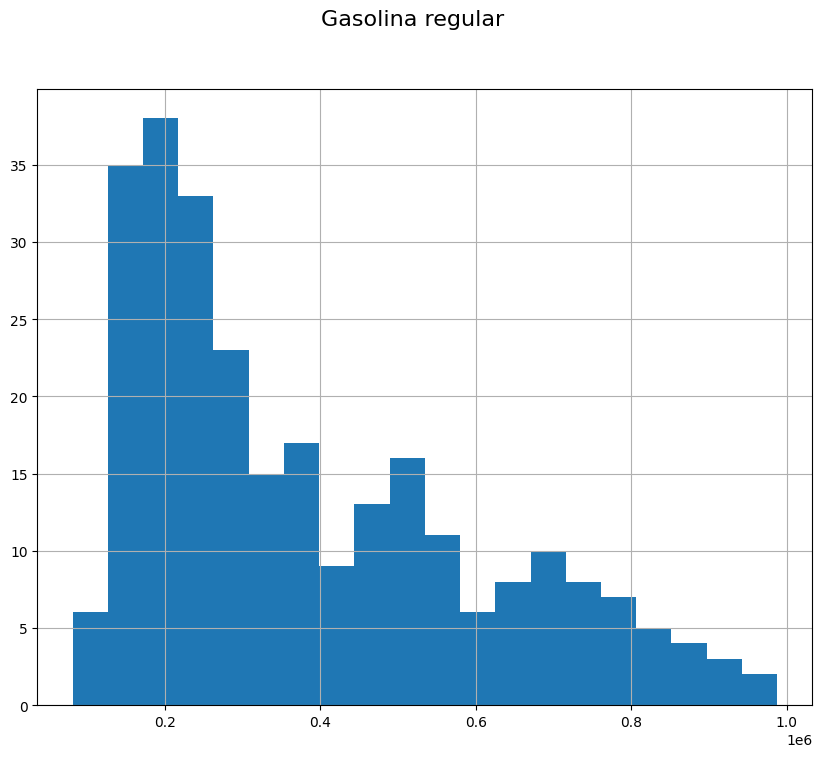

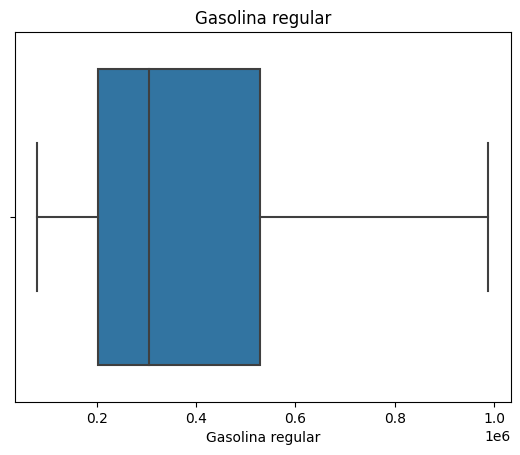

In [126]:
# Gasolina regular de la importación.
print(df["Gasolina regular"])

print(df["Gasolina regular"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina regular"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina regular', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina regular', data=df)
plt.title('Gasolina regular')
plt.show()

0      202645.20
1      205530.96
2      229499.56
3      210680.40
4      208164.34
         ...    
276    804524.73
277    737345.64
278    875010.34
279    798128.36
280    866826.79
Name: Gasolina regular, Length: 281, dtype: float64
count       281.000000
mean     367626.393713
std      192320.697369
min      160741.900000
25%      213645.390000
50%      275031.210000
75%      502041.670000
max      875010.340000
Name: Gasolina regular, dtype: float64


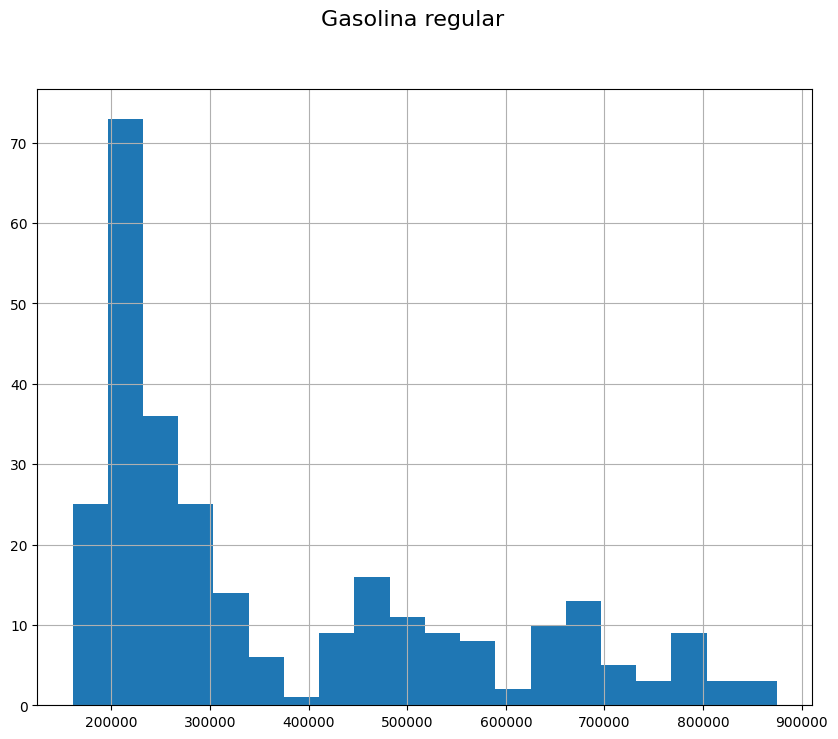

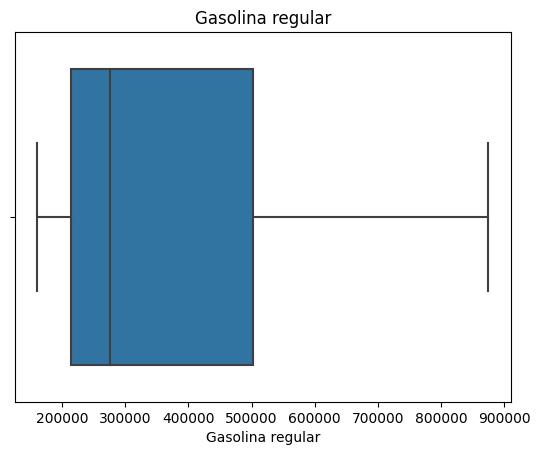

In [127]:
# Gasolina regular.
print(df2["Gasolina regular"])

print(df2["Gasolina regular"].describe())

# Histogramas de todas las columnas numéricas
df2["Gasolina regular"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina regular', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina regular', data=df2)
plt.title('Gasolina regular')
plt.show()

0      373963.96
1      243091.07
2      312084.38
3      285054.89
4      300913.67
         ...    
264    578792.14
265    685183.06
266    633849.05
267    572201.36
268    668478.73
Name: Gasolina superior, Length: 269, dtype: float64
count       281.000000
mean     457160.659412
std      104043.501753
min      300242.781667
25%      381595.195833
50%      416497.410000
75%      551000.790000
max      768102.830000
Name: Gasolina superior, dtype: float64


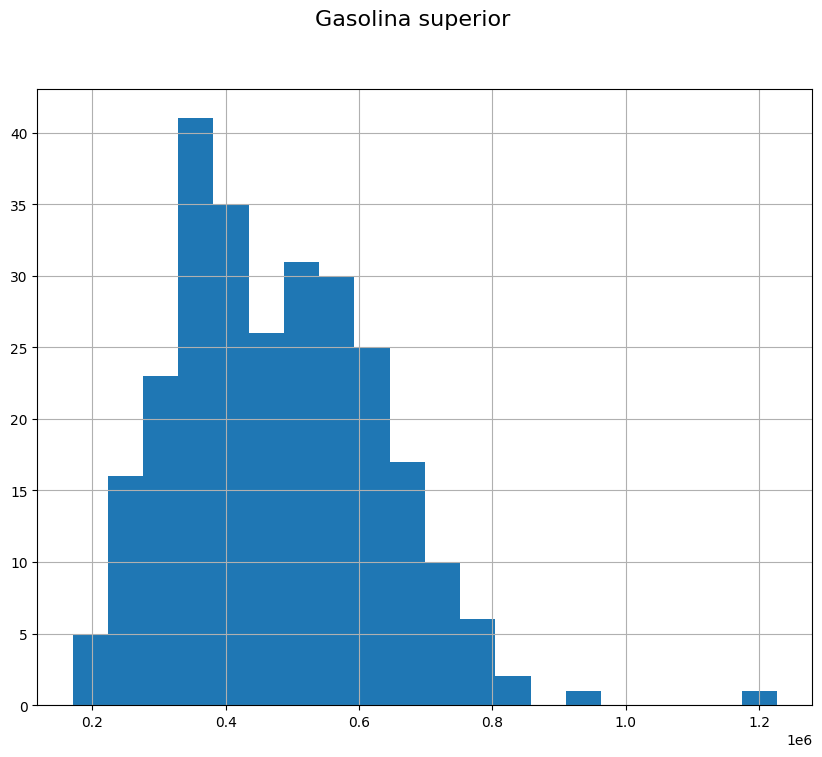

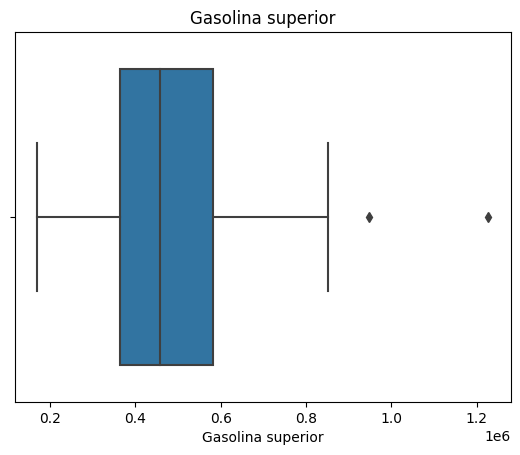

In [128]:
# Gasolina superior.
print(df["Gasolina superior"])

print(df2["Gasolina superior"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina superior"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina superior', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina superior', data=df)
plt.title('Gasolina superior')
plt.show()

0      308156.82
1      307766.31
2      331910.29
3      315648.08
4      319667.97
         ...    
276    599501.29
277    544144.00
278    656941.64
279    585642.20
280    646221.20
Name: Gasolina superior, Length: 281, dtype: float64
count       281.000000
mean     457160.659412
std      104043.501753
min      300242.781667
25%      381595.195833
50%      416497.410000
75%      551000.790000
max      768102.830000
Name: Gasolina superior, dtype: float64


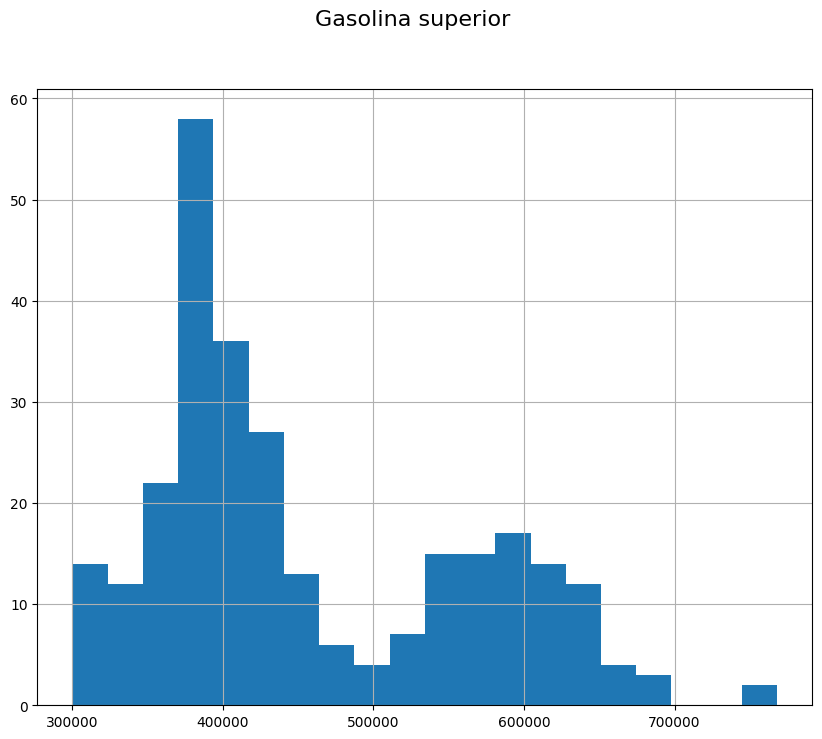

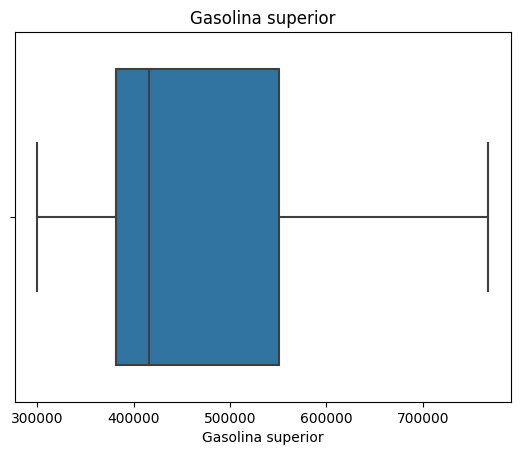

In [129]:
# Gasolina superior.
print(df2["Gasolina superior"])

print(df2["Gasolina superior"].describe())

# Histogramas de todas las columnas numéricas
df2["Gasolina superior"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina superior', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina superior', data=df2)
plt.title('Gasolina superior')
plt.show()

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
264    1442099.08
265    1267967.39
266    1317519.91
267    1417182.73
268    1428099.62
Name: Diesel bajo azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     2.707193e+05
std      4.923333e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.592580e+06
Name: Diesel bajo azufre, dtype: float64


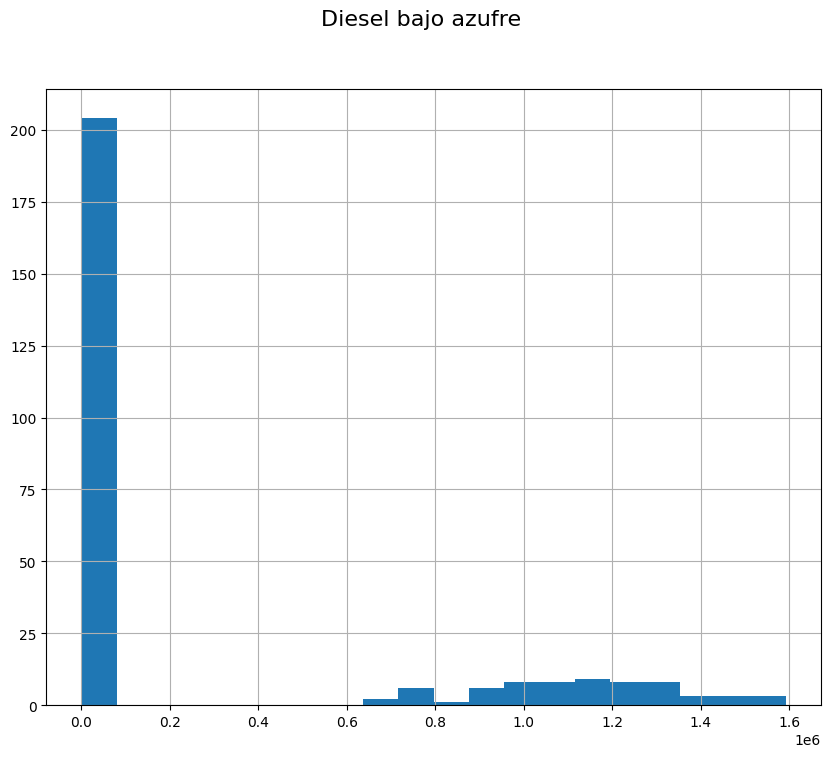

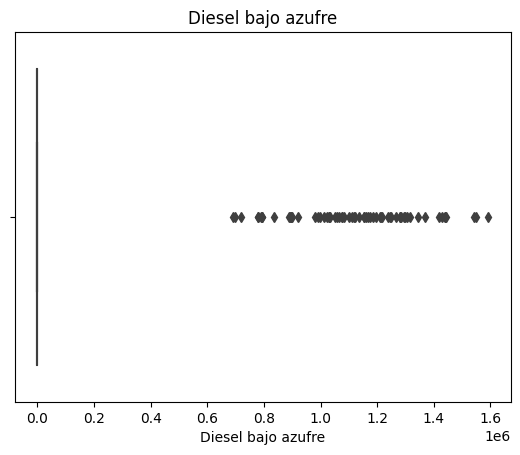

In [130]:
# Diesel bajo azufre.
print(df["Diesel bajo azufre"])

print(df["Diesel bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel bajo azufre', data=df)
plt.title('Diesel bajo azufre')
plt.show()

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
276    1285932.51
277    1226884.63
278    1463008.43
279    1248429.37
280    1346554.12
Name: Diesel bajo azufre, Length: 281, dtype: float64
count    2.810000e+02
mean     2.603631e+05
std      4.804376e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.463008e+06
Name: Diesel bajo azufre, dtype: float64


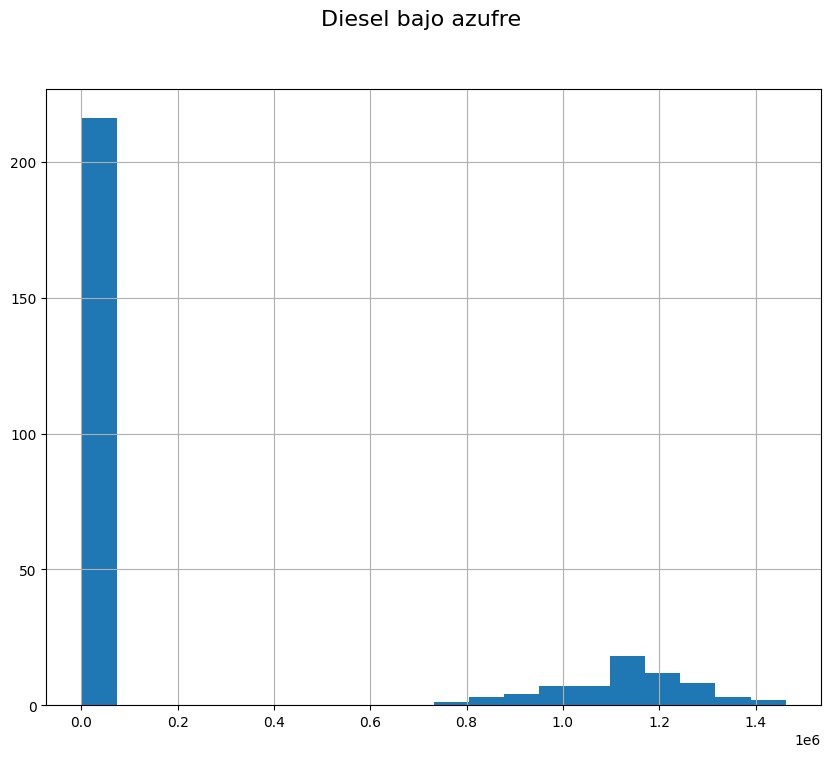

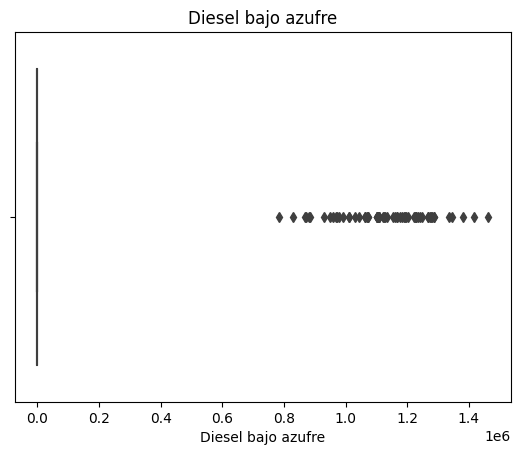

In [131]:
# Diesel bajo azufre.
print(df2["Diesel bajo azufre"])

print(df2["Diesel bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel bajo azufre', data=df2)
plt.title('Diesel bajo azufre')
plt.show()

0      566101.99
1      489525.80
2      575559.68
3      437745.42
4      552609.13
         ...    
264         0.00
265         0.00
266         0.00
267         0.00
268         0.00
Name: Diesel alto azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     5.932604e+05
std      3.955986e+05
min      0.000000e+00
25%      3.219529e+05
50%      6.836644e+05
75%      8.508069e+05
max      1.595699e+06
Name: Diesel alto azufre, dtype: float64


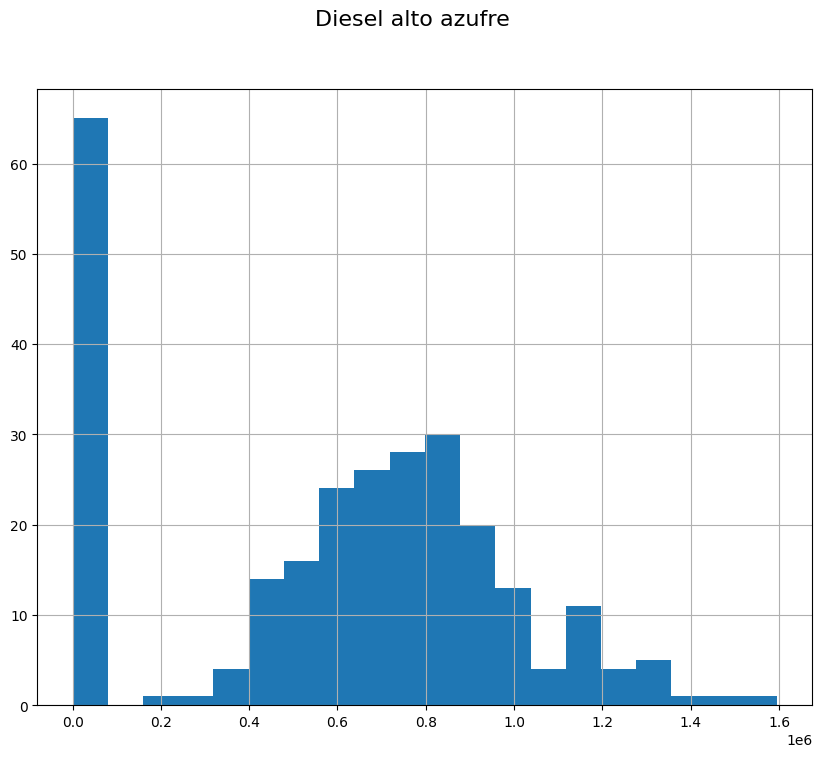

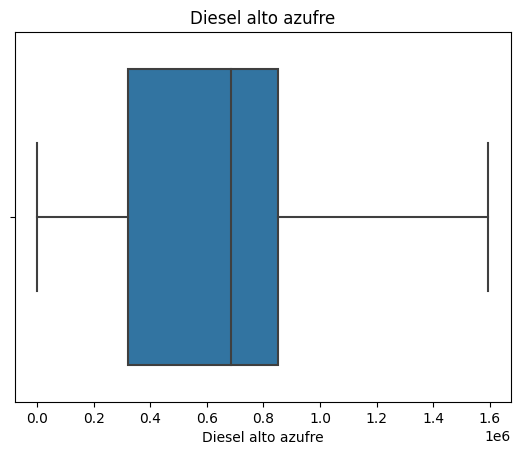

In [132]:
# Diesel alto azufre
print(df["Diesel alto azufre"])

print(df["Diesel alto azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel alto azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel alto azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel alto azufre', data=df)
plt.title('Diesel alto azufre')
plt.show()

0      634667.06
1      642380.66
2      699807.25
3      586803.98
4      656948.20
         ...    
276         0.00
277         0.00
278         0.00
279         0.00
280         0.00
Name: Diesel alto azufre, Length: 281, dtype: float64
count    2.810000e+02
mean     5.925927e+05
std      3.478895e+05
min      0.000000e+00
25%      5.578026e+05
50%      6.998072e+05
75%      8.076921e+05
max      1.216423e+06
Name: Diesel alto azufre, dtype: float64


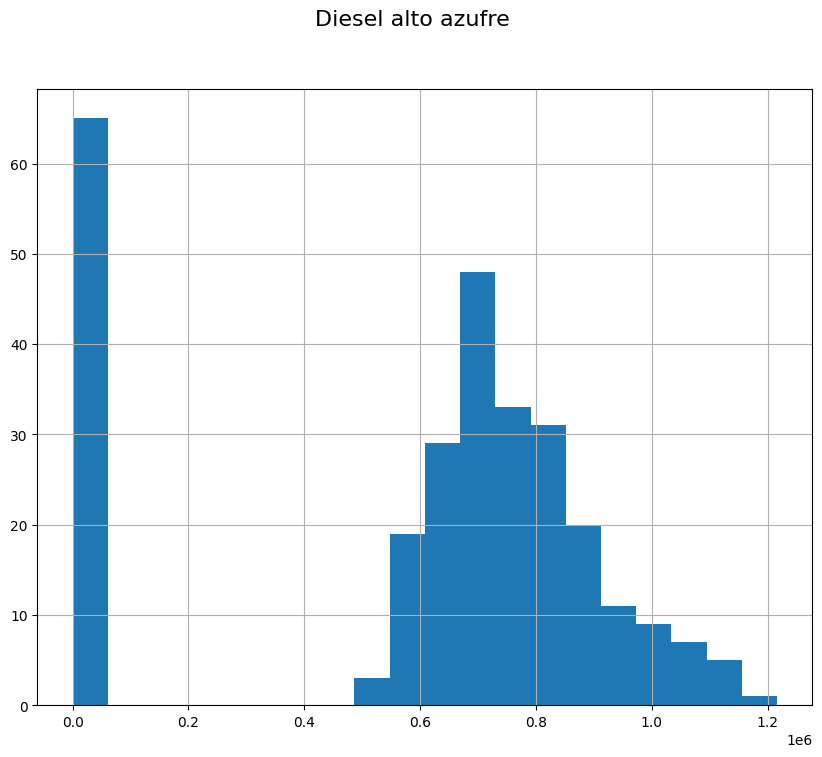

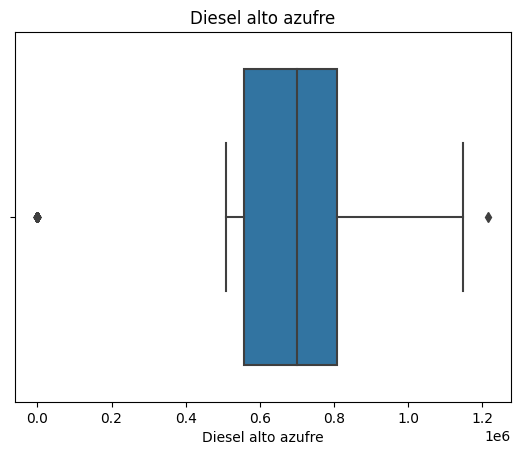

In [133]:
# Diesel alto azufre
print(df2["Diesel alto azufre"])

print(df2["Diesel alto azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel alto azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel alto azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel alto azufre', data=df2)
plt.title('Diesel alto azufre')
plt.show()

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
264    45074.97
265        0.00
266     4985.21
267    21503.98
268    15047.82
Name: Diesel ultra bajo azufre, Length: 269, dtype: float64
count      269.000000
mean      2644.297993
std       8639.971237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      48945.910000
Name: Diesel ultra bajo azufre, dtype: float64


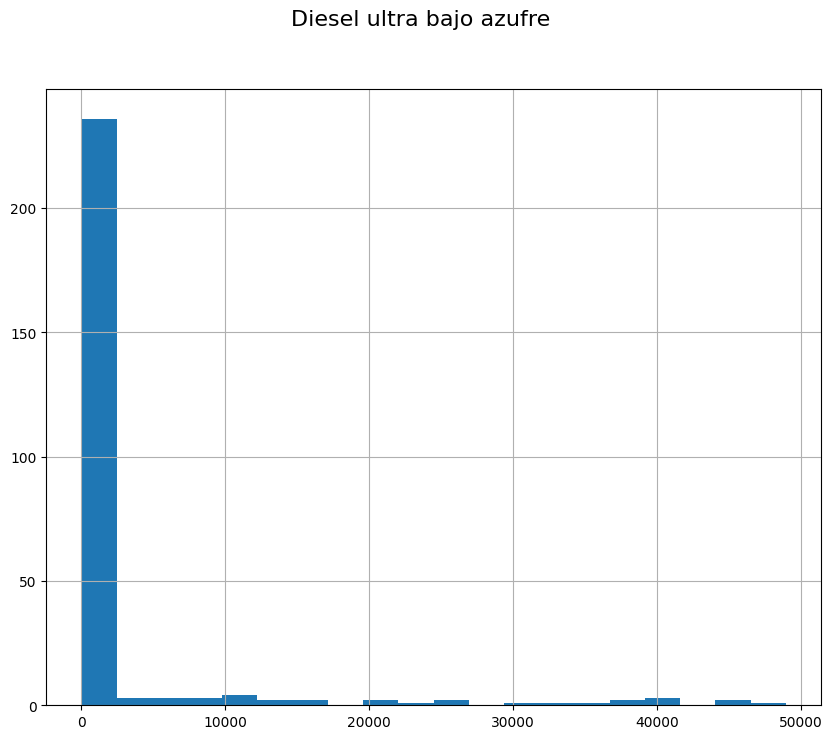

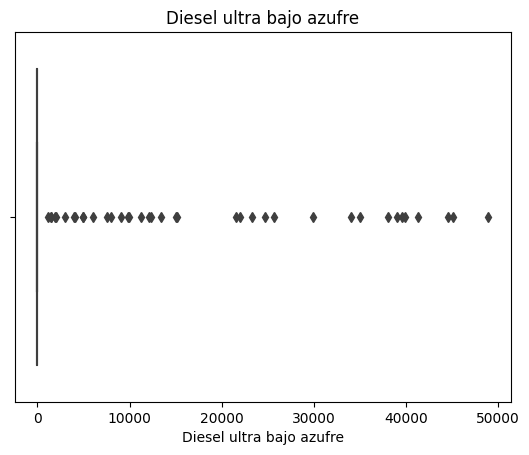

In [134]:
# Diesel ultra bajo azufre
print(df["Diesel ultra bajo azufre"])

print(df["Diesel ultra bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel ultra bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel ultra bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel ultra bajo azufre', data=df)
plt.title('Diesel ultra bajo azufre')
plt.show()

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
276     9391.16
277     8398.95
278    11462.71
279    10553.37
280    12201.45
Name: Diesel ultra bajo azufre, Length: 281, dtype: float64
count      281.000000
mean      2303.973381
std       4363.660816
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16475.250000
Name: Diesel ultra bajo azufre, dtype: float64


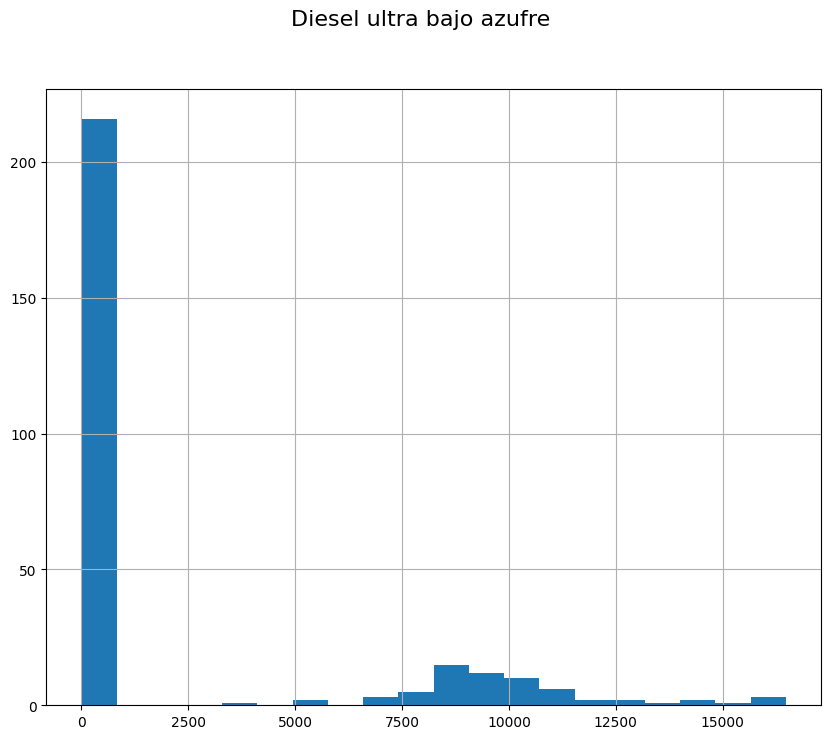

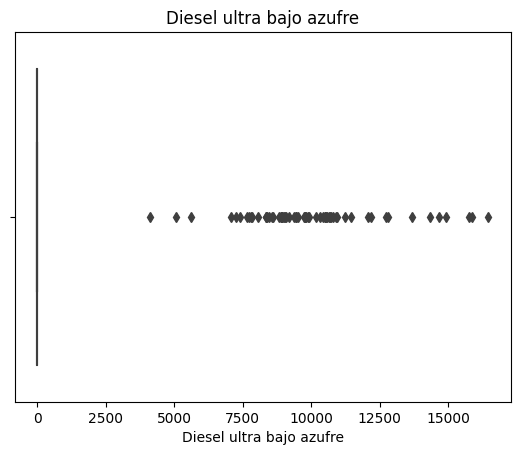

In [135]:
# Diesel ultra bajo azufre
print(df2["Diesel ultra bajo azufre"])

print(df2["Diesel ultra bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df2["Diesel ultra bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel ultra bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel ultra bajo azufre', data=df2)
plt.title('Diesel ultra bajo azufre')
plt.show()

0      194065.738095
1      170703.380952
2      161837.371429
3      163048.642857
4      171518.861905
           ...      
264    497780.690000
265    652984.710000
266    711978.350000
267    647666.300000
268    713348.990000
Name: Gas licuado de petróleo, Length: 269, dtype: float64
count       269.000000
mean     399026.255764
std      190173.418737
min      100561.466667
25%      218257.510952
50%      396363.050000
75%      540671.880952
max      960840.530000
Name: Gas licuado de petróleo, dtype: float64


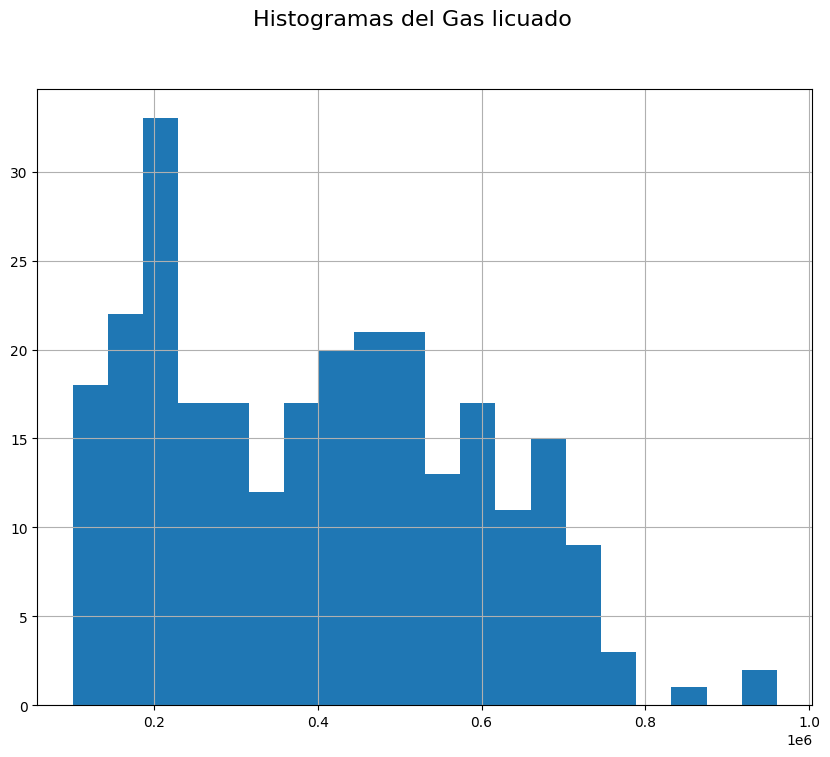

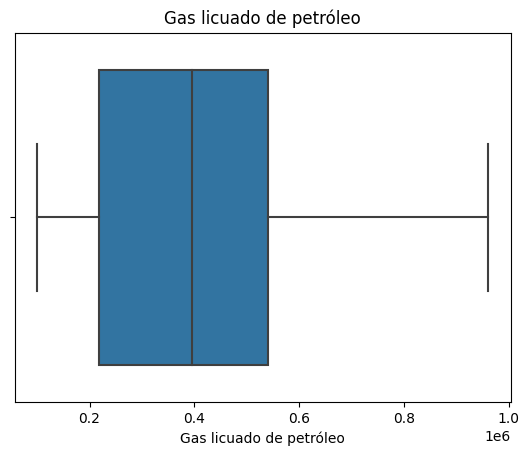

In [136]:
# Gas licuado de petróleo
print(df["Gas licuado de petróleo"])

print(df["Gas licuado de petróleo"].describe())

# Histogramas de todas las columnas numéricas
df["Gas licuado de petróleo"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas del Gas licuado', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gas licuado de petróleo', data=df)
plt.title('Gas licuado de petróleo')
plt.show()

0      194410.476190
1      174710.552381
2      189234.066667
3      174330.607143
4      191745.147619
           ...      
276    574148.000000
277    497273.190000
278    588892.160000
279    513919.890000
280    565814.790000
Name: Gas licuado de petróleo, Length: 281, dtype: float64
count       281.000000
mean     303105.399669
std      101787.584186
min      167818.137897
25%      225593.823095
50%      256040.102381
75%      373503.775714
max      588892.160000
Name: Gas licuado de petróleo, dtype: float64


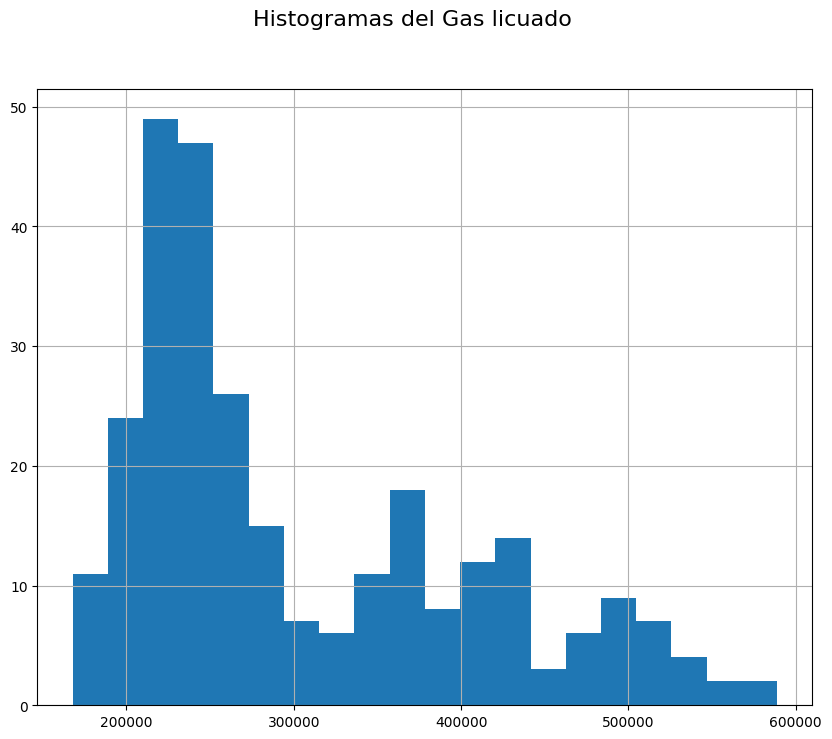

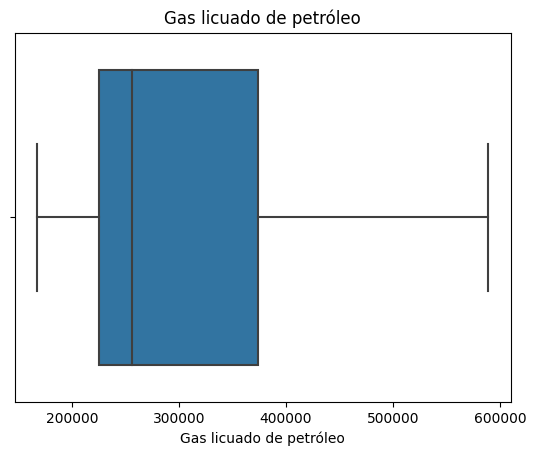

In [137]:
# Gas licuado de petróleo
print(df2["Gas licuado de petróleo"])

print(df2["Gas licuado de petróleo"].describe())

# Histogramas de todas las columnas numéricas
df2["Gas licuado de petróleo"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas del Gas licuado', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gas licuado de petróleo', data=df2)
plt.title('Gas licuado de petróleo')
plt.show()

#### Verificando los meses en los que hay más importaciones.

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


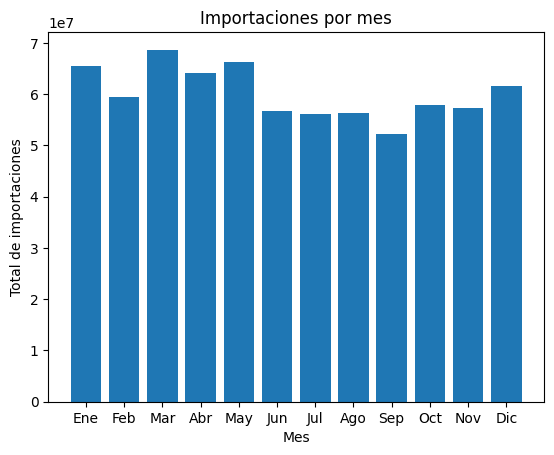

mes
3     6.868623e+07
5     6.624585e+07
1     6.551964e+07
4     6.407447e+07
12    6.157861e+07
2     5.943550e+07
10    5.782820e+07
11    5.724037e+07
6     5.667567e+07
8     5.626350e+07
7     5.614741e+07
9     5.222438e+07
Name: Total importación, dtype: float64
El mes con más importaciones fue: March


In [138]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Gráfico de barras para mostrar las importaciones por mes
plt.bar(importaciones_por_mes.index, importaciones_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Total de importaciones')
plt.title('Importaciones por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Obteniendo los meses con más exportación en orden descendente.
meses_mas_importaciones = importaciones_por_mes.sort_values(ascending=False)
print(meses_mas_importaciones)


# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Obtener el nombre del mes con más importaciones
mes_max_importaciones = importaciones_por_mes.idxmax()

# Obtener el nombre del mes usando el módulo calendar
nombre_mes_max_importaciones = calendar.month_name[mes_max_importaciones]

print("El mes con más importaciones fue:", nombre_mes_max_importaciones)

#### Verificando los meses en donde hay más consumo

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 281, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 281, dtype: int32
mes
1     6.239329e+07
2     6.072456e+07
3     6.740221e+07
4     6.339105e+07
5     6.496297e+07
6     5.613530e+07
7     5.729006e+07
8     5.777696e+07
9     5.392756e+07
10    5.749272e+07
11    5.897910e+07
12    6.273060e+07
Name: Total, dtype: float64


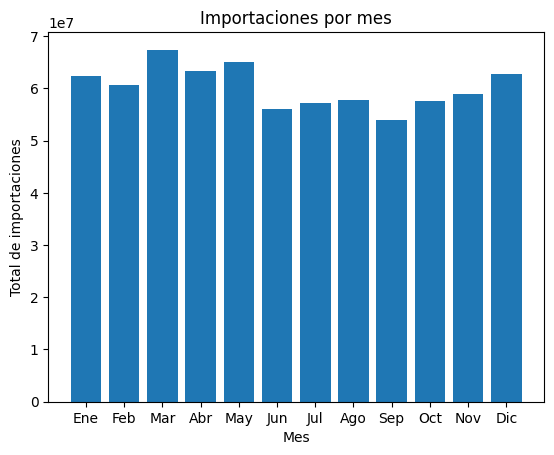

mes
3     6.740221e+07
5     6.496297e+07
4     6.339105e+07
12    6.273060e+07
1     6.239329e+07
2     6.072456e+07
11    5.897910e+07
8     5.777696e+07
10    5.749272e+07
7     5.729006e+07
6     5.613530e+07
9     5.392756e+07
Name: Total, dtype: float64
El mes con más importaciones fue: March


In [139]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df2.groupby('mes')['Total'].sum()

print(importaciones_por_mes)

# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Gráfico de barras para mostrar las importaciones por mes
plt.bar(importaciones_por_mes.index, importaciones_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Total de importaciones')
plt.title('Importaciones por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Obteniendo los meses con más exportación en orden descendente.
meses_mas_importaciones = importaciones_por_mes.sort_values(ascending=False)
print(meses_mas_importaciones)


# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Obtener el nombre del mes con más importaciones
mes_max_importaciones = importaciones_por_mes.idxmax()

# Obtener el nombre del mes usando el módulo calendar
nombre_mes_max_importaciones = calendar.month_name[mes_max_importaciones]

print("El mes con más importaciones fue:", nombre_mes_max_importaciones)

#### Viendo el comportamiento de las exportaciones comprendido entre el 2018 hasta el 2023

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


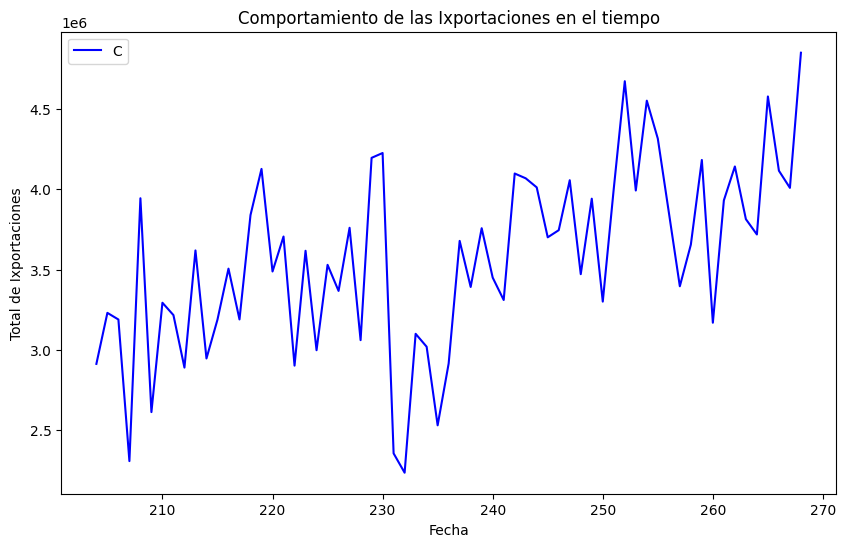

In [140]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2018-01-01') & (df['Fecha'] <= '2023-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Viendo el comportamiento de consumo entre 2018 y 2023

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 281, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 281, dtype: int32
mes
1     6.239329e+07
2     6.072456e+07
3     6.740221e+07
4     6.339105e+07
5     6.496297e+07
6     5.613530e+07
7     5.729006e+07
8     5.777696e+07
9     5.392756e+07
10    5.749272e+07
11    5.897910e+07
12    6.273060e+07
Name: Total, dtype: float64


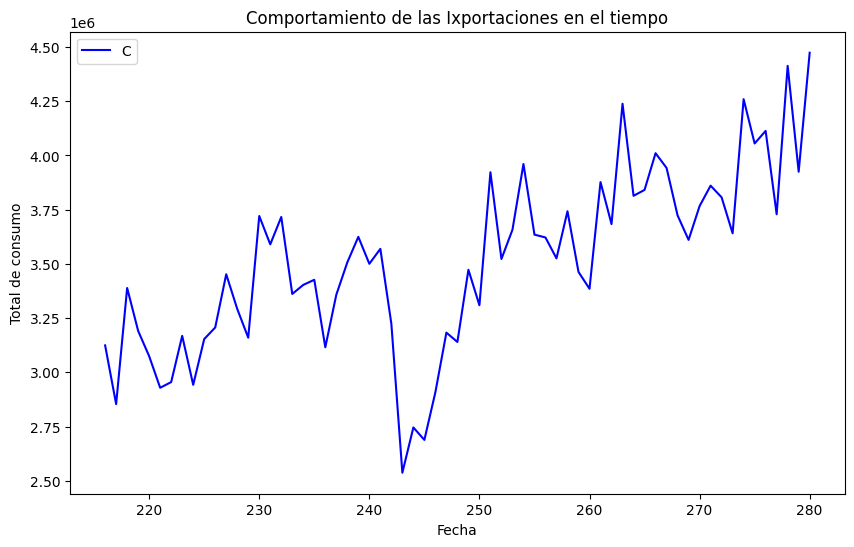

In [141]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df2.groupby('mes')['Total'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df2 = df2[(df2['Fecha'] >= '2018-01-01') & (df2['Fecha'] <= '2023-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['Total'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de consumo')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Comportamiento de la importación durante la pandemia

204   2018-01-01
205   2018-02-01
206   2018-03-01
207   2018-04-01
208   2018-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 65, dtype: datetime64[ns]
204    1
205    2
206    3
207    4
208    5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 65, dtype: int32
mes
1     2.131839e+07
2     2.249465e+07
3     2.401840e+07
4     2.117984e+07
5     2.238413e+07
6     1.651291e+07
7     1.661294e+07
8     1.760061e+07
9     1.544022e+07
10    1.869802e+07
11    1.714551e+07
12    1.852302e+07
Name: Total importación, dtype: float64


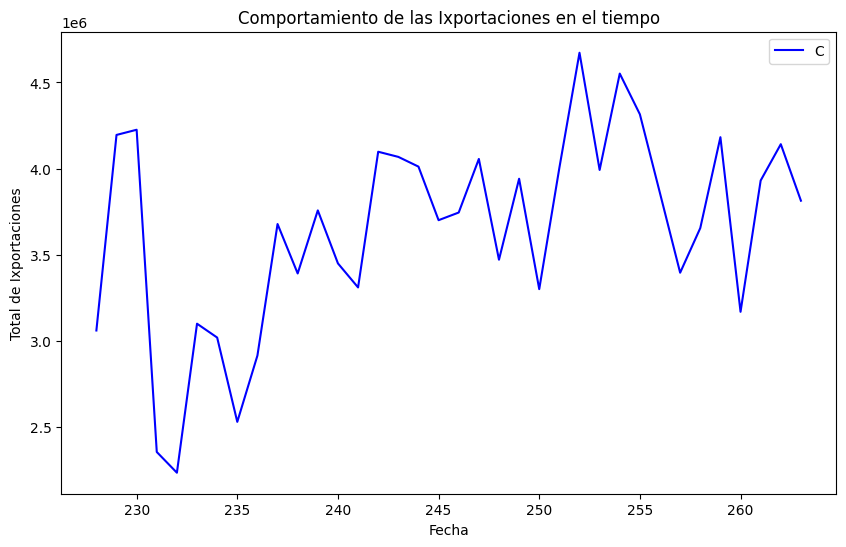

In [142]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2020-01-01') & (df['Fecha'] <= '2022-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Consumo durante la pandemia

216   2018-01-01
217   2018-02-01
218   2018-03-01
219   2018-04-01
220   2018-05-01
         ...    
276   2023-01-01
277   2023-02-01
278   2023-03-01
279   2023-04-01
280   2023-05-01
Name: Fecha, Length: 65, dtype: datetime64[ns]
216    1
217    2
218    3
219    4
220    5
      ..
276    1
277    2
278    3
279    4
280    5
Name: mes, Length: 65, dtype: int32
mes
1     2.136590e+07
2     2.080869e+07
3     2.271654e+07
4     2.081976e+07
5     2.135446e+07
6     1.611408e+07
7     1.677529e+07
8     1.710097e+07
9     1.638929e+07
10    1.750144e+07
11    1.796495e+07
12    1.929178e+07
Name: Total, dtype: float64


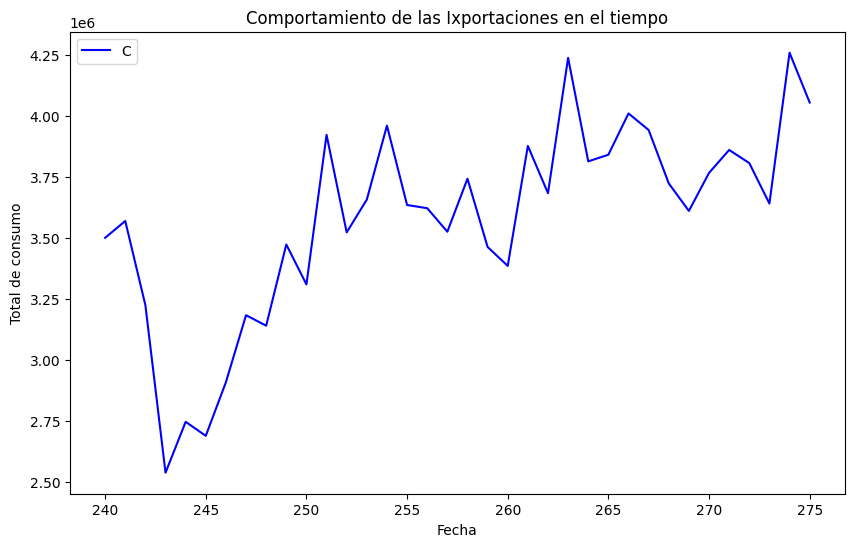

In [143]:
# Cambio de formato.

df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Imprimiendo la fecha.
print(df2["Fecha"])

df2['mes'] = df2['Fecha'].dt.month

# Imprimiendo el mes.
print(df2["mes"])

# Calculando las importaciones por mes.
consumo_pandemia = df2.groupby('mes')['Total'].sum()

print(consumo_pandemia)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df2 = df2[(df2['Fecha'] >= '2020-01-01') & (df2['Fecha'] <= '2022-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['Total'], label='Consumo durante la pandema', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de consumo')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento del consumo durante la pandemia")
plt.show()


####  Picos en importaciones por año por tipo de combustibles

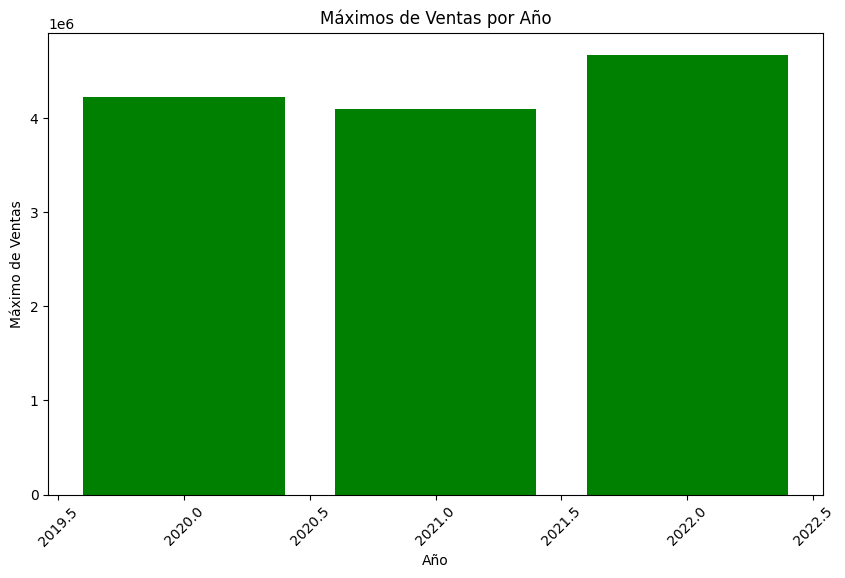

In [144]:
# Patrones de nombres de columnas relacionadas con tipos de combustible
patrones_combustible = r'Gasolina|Diesel|Gas licuado de petróleo'

# Filtrar las columnas relacionadas con tipos de combustible
columnas_combustible = df.filter(regex=patrones_combustible)

# Convertir la columna de fecha al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el año de la columna de fecha
df['Año'] = df['Fecha'].dt.year

# Obteniendo el máximo de ventas por año
maximo_ventas = df.groupby('Año').max()

# Visualizar los máximos de ventas en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(maximo_ventas.index, maximo_ventas['Total importación'], color='g')
plt.xlabel('Año')
plt.ylabel('Máximo de Ventas')
plt.title('Máximos de Ventas por Año')
plt.xticks(rotation=45)
plt.show()

#### Picos de consumo por año y tipo de de combustible

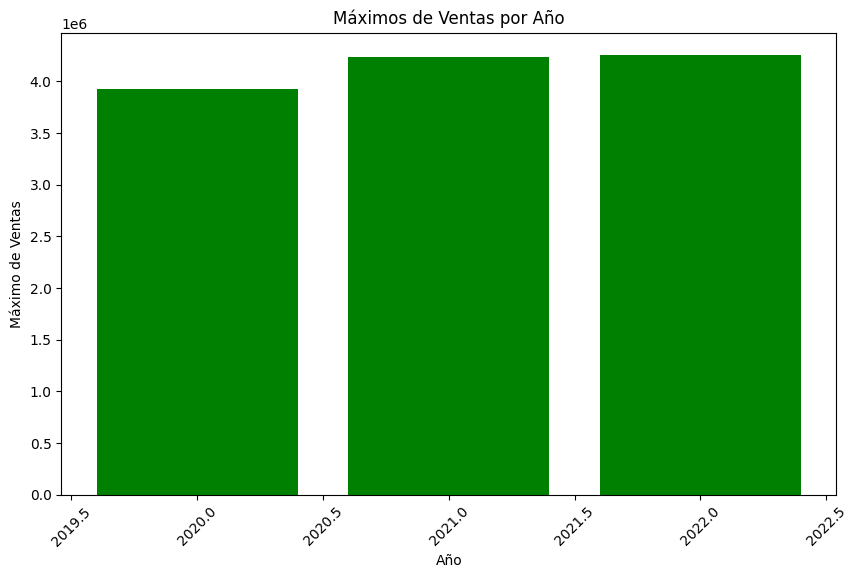

In [145]:
# Patrones de nombres de columnas relacionadas con tipos de combustible
patrones_combustible = r'Gasolina|Diesel|Gas licuado de petróleo'

# Filtrar las columnas relacionadas con tipos de combustible
columnas_combustible = df2.filter(regex=patrones_combustible)

# Convertir la columna de fecha al tipo de dato 'datetime'
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Extraer el año de la columna de fecha
df2['Año'] = df2['Fecha'].dt.year

# Obteniendo el máximo de ventas por año
maximo_ventas = df2.groupby('Año').max()

# Visualizar los máximos de ventas en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(maximo_ventas.index, maximo_ventas['Total'], color='g')
plt.xlabel('Año')
plt.ylabel('Máximo de Ventas')
plt.title('Máximos de Ventas por Año')
plt.xticks(rotation=45)
plt.show()

#### Analizando la correlación entre las gasolinas y el total de importación.

                          Diesel bajo azufre  Diesel ultra bajo azufre   
Diesel bajo azufre                  1.000000                  0.155028  \
Diesel ultra bajo azufre            0.155028                  1.000000   
Gasolina superior                   0.503870                  0.103238   
Diesel alto azufre                       NaN                       NaN   
Gasolina regular                    0.395611                 -0.033806   
Gas licuado de petróleo             0.011612                 -0.199601   
Total importación                   0.782976                 -0.008097   

                          Gasolina superior  Diesel alto azufre   
Diesel bajo azufre                 0.503870                 NaN  \
Diesel ultra bajo azufre           0.103238                 NaN   
Gasolina superior                  1.000000                 NaN   
Diesel alto azufre                      NaN                 NaN   
Gasolina regular                   0.404844                 NaN   
Gas l

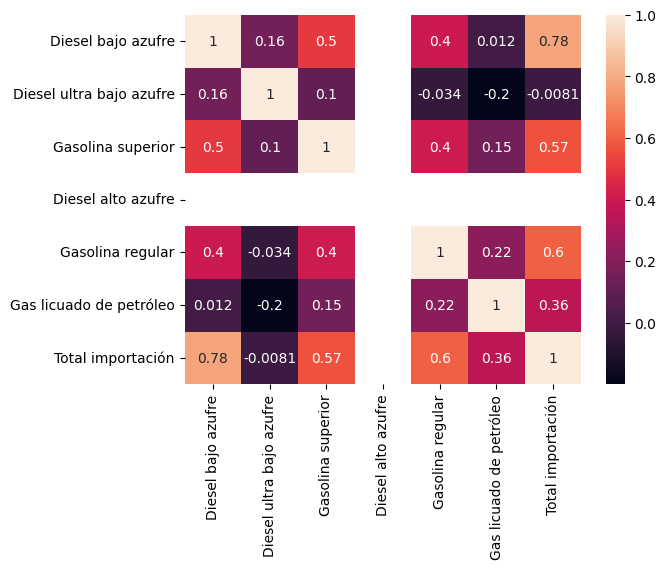

In [146]:
# Selecciona las columnas de interés
columns_of_interest = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo', "Total importación"]
subset_df = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = subset_df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Graficando la matriz de correlación.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Analizando la correlación entre las gasolinas y el consumo.

                          Diesel bajo azufre  Diesel ultra bajo azufre   
Diesel bajo azufre                  1.000000                  0.582191  \
Diesel ultra bajo azufre            0.582191                  1.000000   
Gasolina superior                   0.738270                  0.774975   
Diesel alto azufre                       NaN                       NaN   
Gasolina regular                    0.651068                  0.475449   
Gas licuado de petróleo             0.544477                  0.434581   
Total                               0.850094                  0.566787   

                          Gasolina superior  Diesel alto azufre   
Diesel bajo azufre                 0.738270                 NaN  \
Diesel ultra bajo azufre           0.774975                 NaN   
Gasolina superior                  1.000000                 NaN   
Diesel alto azufre                      NaN                 NaN   
Gasolina regular                   0.589994                 NaN   
Gas l

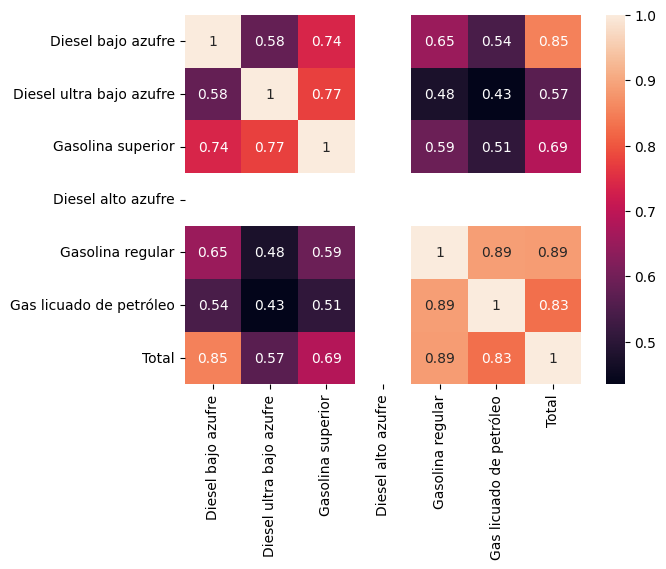

In [147]:
# Selecciona las columnas de interés
columns_of_interest = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo', "Total"]
subset_df = df2[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = subset_df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Graficando la matriz de correlación.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Haciendo análisis de correlación cruzada para la importación

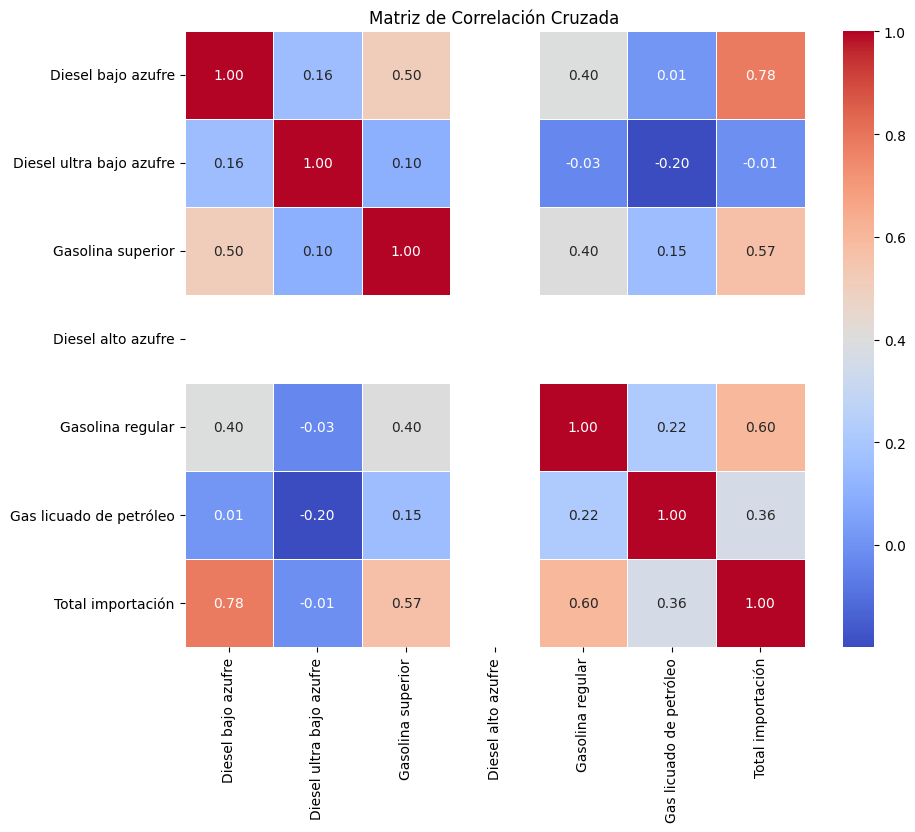

In [148]:
# Selecciona las columnas de interés
gasolina_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']
total_import_column = 'Total importación'

# Crea un DataFrame con las columnas de gasolina y el total de importación
gasolina_total_import_df = df[gasolina_columns + [total_import_column]]

# Calcula la matriz de correlación cruzada
correlation_matrix = gasolina_total_import_df.corr()

# Grafica el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada')
plt.show()

#### Haciendo correlación cruzada en el consumo

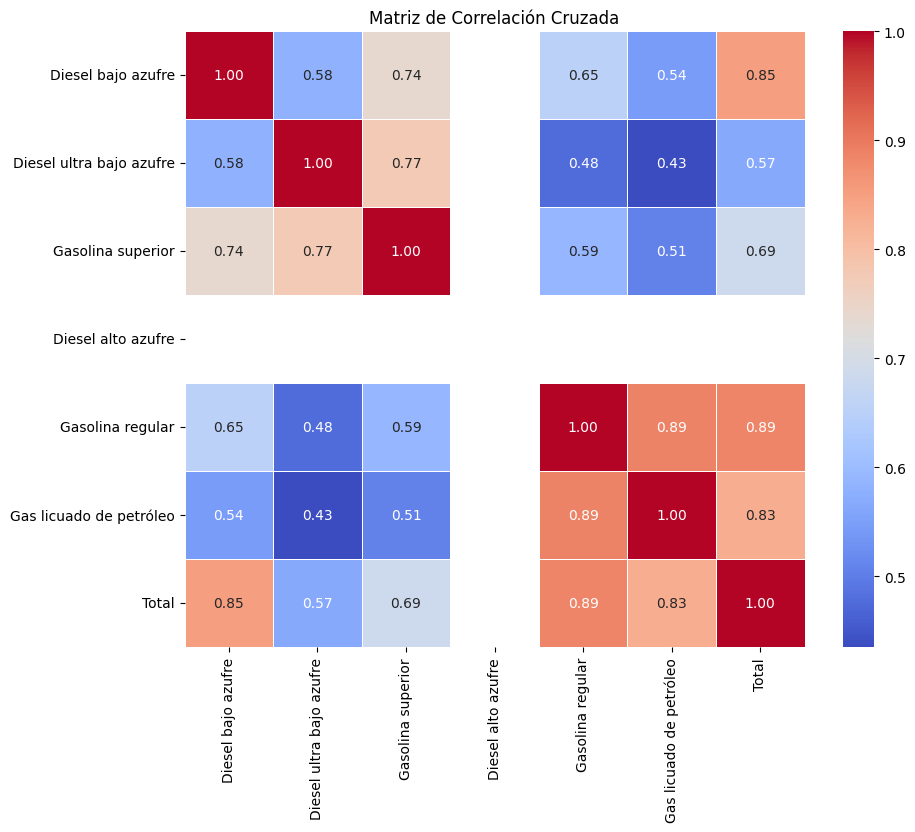

In [149]:
# Selecciona las columnas de interés
gasolina_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']
total_import_column = 'Total'

# Crea un DataFrame con las columnas de gasolina y el total de importación
gasolina_total_import_df = df2[gasolina_columns + [total_import_column]]

# Calcula la matriz de correlación cruzada
correlation_matrix = gasolina_total_import_df.corr()

# Grafica el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada')
plt.show()

#### Comparación de las importaciones de los productos

In [150]:
# Selecciona las columnas de interés para el análisis de comparación
product_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Calcula la suma de importaciones para cada producto
total_imports_by_product = df[product_columns].sum()

# Muestra la comparación de las importaciones para cada producto
print(total_imports_by_product)

Diesel bajo azufre          4.072828e+07
Diesel ultra bajo azufre    3.951415e+05
Gasolina superior           2.223256e+07
Diesel alto azufre          0.000000e+00
Gasolina regular            2.554468e+07
Gas licuado de petróleo     2.208297e+07
dtype: float64


#### Comparación del consumo de los productos

In [151]:
# Selecciona las columnas de interés para el análisis de comparación
product_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Calcula la suma de importaciones para cada producto
total_imports_by_product = df2[product_columns].sum()

# Muestra la comparación de las importaciones para cada producto
print(total_imports_by_product)

Diesel bajo azufre          41002028.58
Diesel ultra bajo azufre      364897.46
Gasolina superior           21364449.76
Diesel alto azufre                 0.00
Gasolina regular            25012484.79
Gas licuado de petróleo     17153432.58
dtype: float64


#### Análisis de outliers de las variables de la importación.

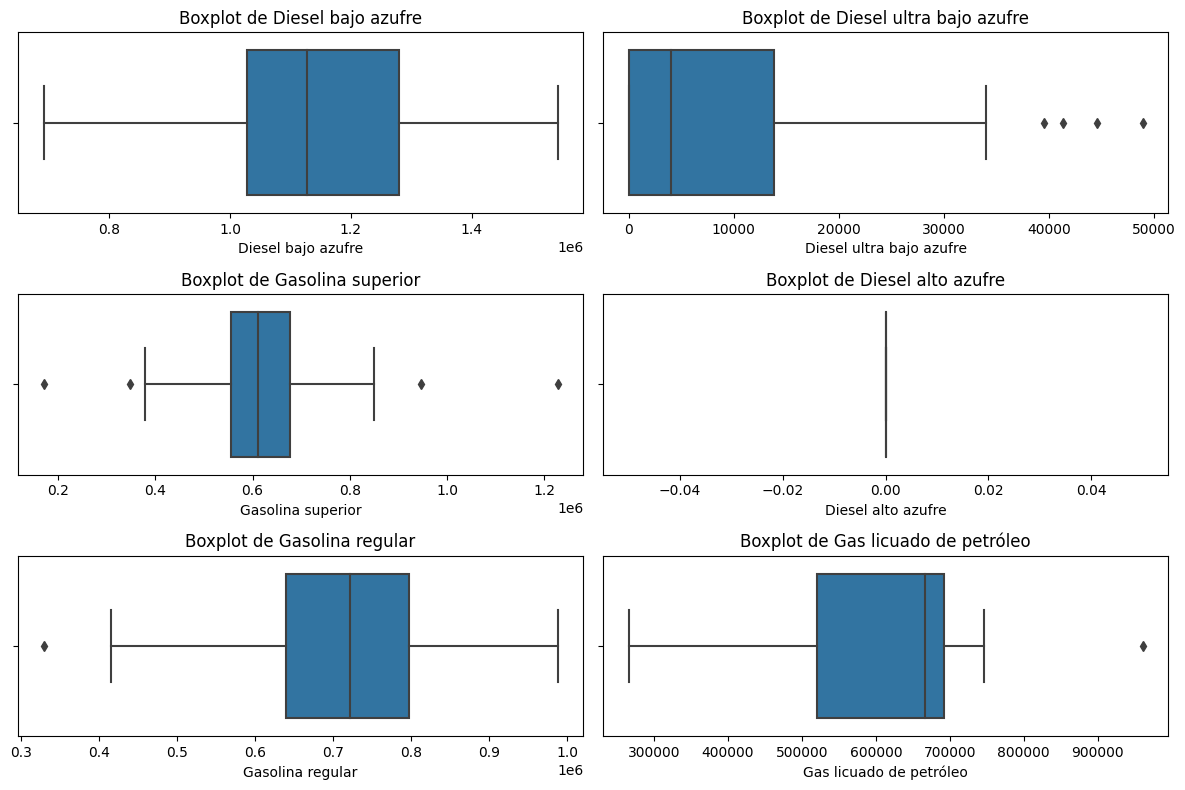

In [152]:
# Selecciona las columnas de interés para el análisis de outliers
outlier_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Crea un subplot de tamaño 3x2 para visualizar los boxplots
plt.figure(figsize=(12, 8))

# Itera sobre cada columna para crear los boxplots
for i, column in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

#### Análisis de outliers de las variables del consumo.

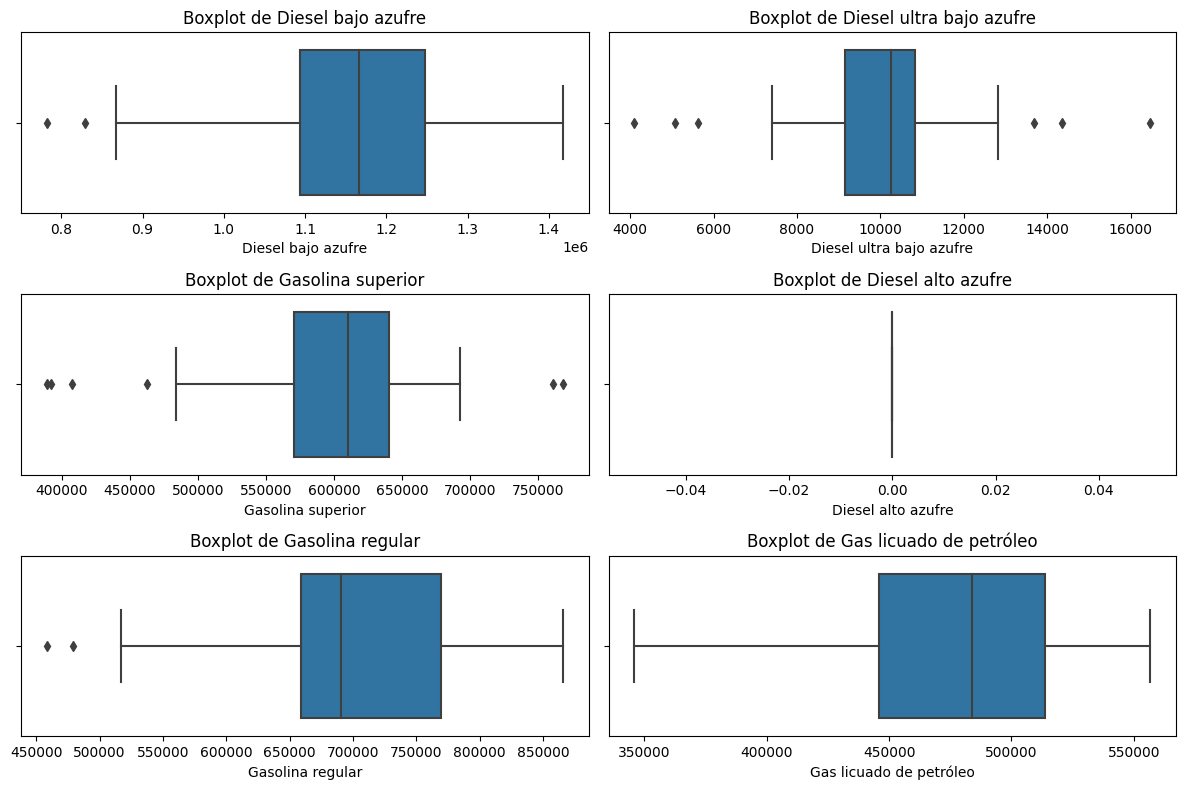

In [153]:
# Selecciona las columnas de interés para el análisis de outliers
outlier_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Crea un subplot de tamaño 3x2 para visualizar los boxplots
plt.figure(figsize=(12, 8))

# Itera sobre cada columna para crear los boxplots
for i, column in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

### Inciso 2: Consumo mensual de gasolina , gasolina regular, diésel y gas licuado en importación.

Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación', 'mes', 'Año'],
      dtype='object')


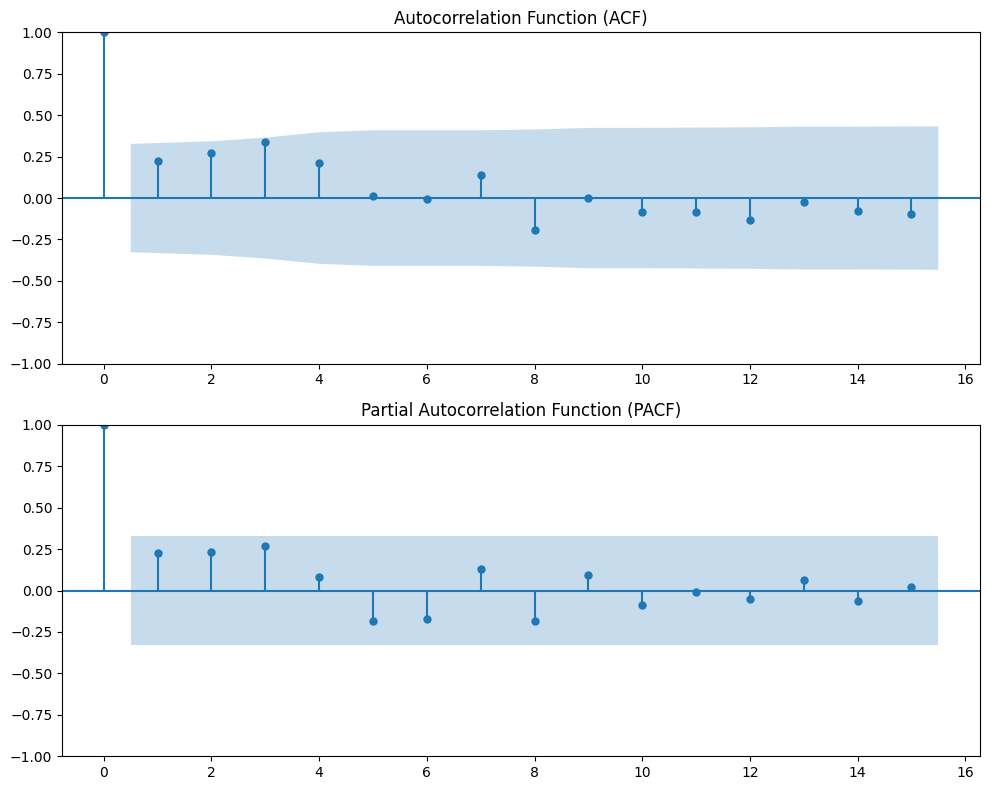

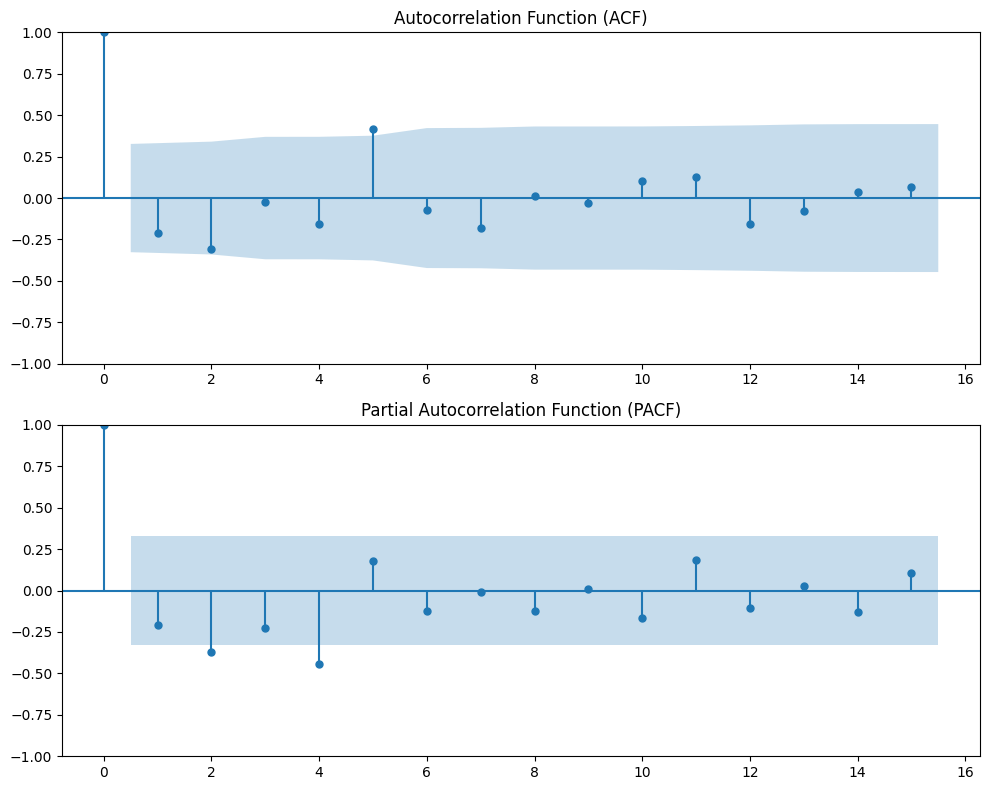

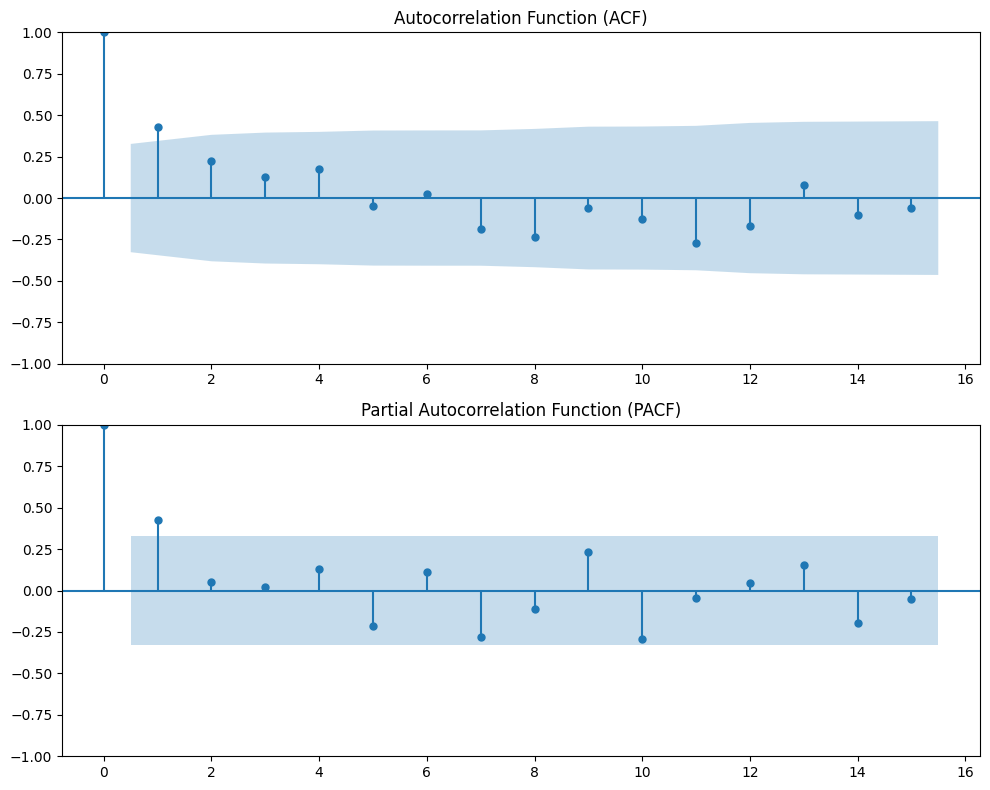

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


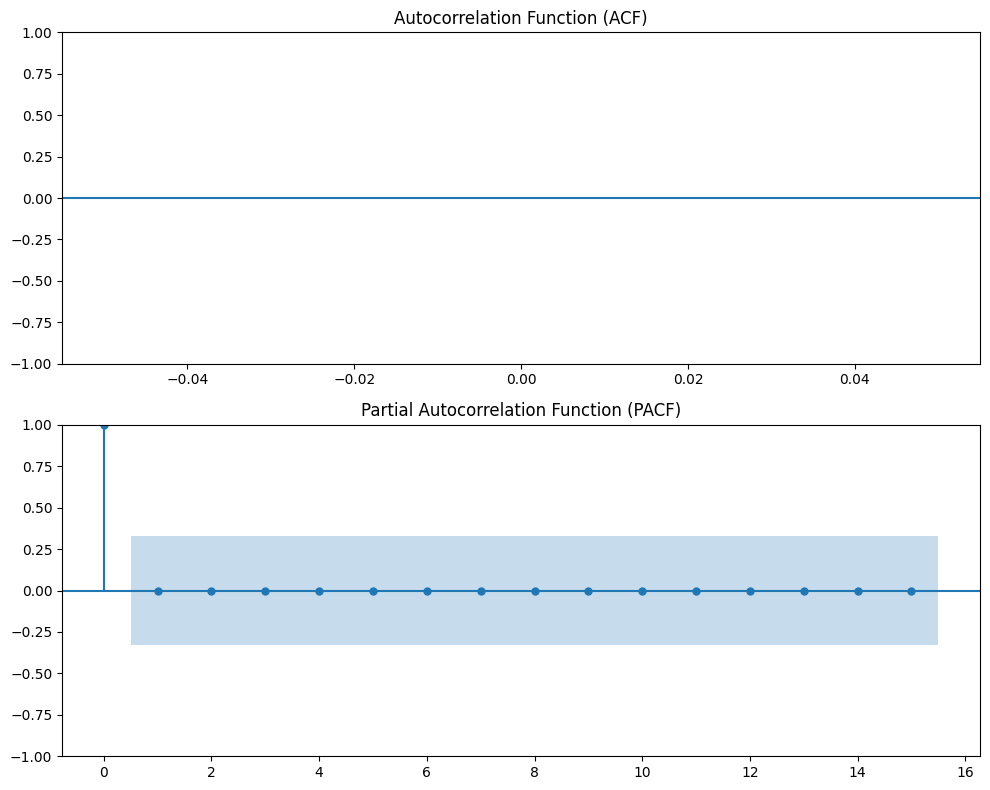

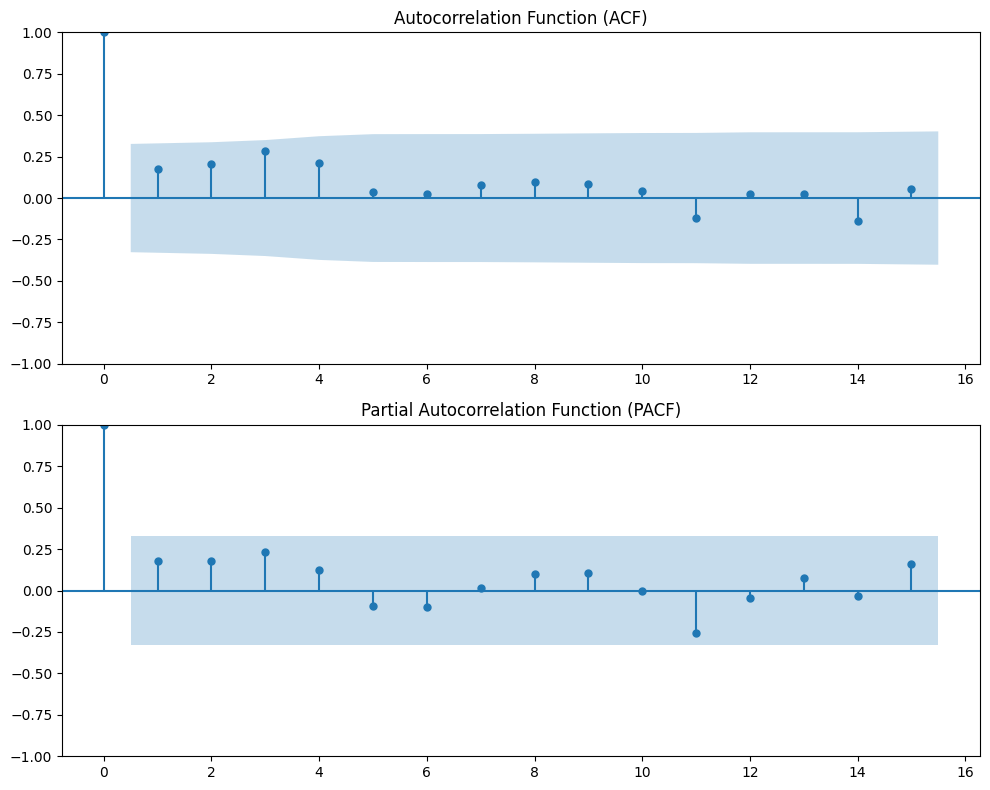

In [154]:
print(df.columns)

# Convierte la columna de fechas a formato de fecha
df['mes'] = pd.to_datetime(df['mes'])

def plot_acf_pacf(data, lags=15):
    # Crea subplots para los gráficos ACF y PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('mes', inplace=True)

# Visualización de gráficos ACF y PACF para cada serie de tiempo
plot_acf_pacf(df['Diesel bajo azufre'])
plot_acf_pacf(df['Diesel ultra bajo azufre'])
plot_acf_pacf(df['Gasolina superior'])
plot_acf_pacf(df['Diesel alto azufre'])
plot_acf_pacf(df['Gasolina regular'])

### Inciso 2: Consumo mensual de gasolina , gasolina regular, diésel y gas licuado en importación.

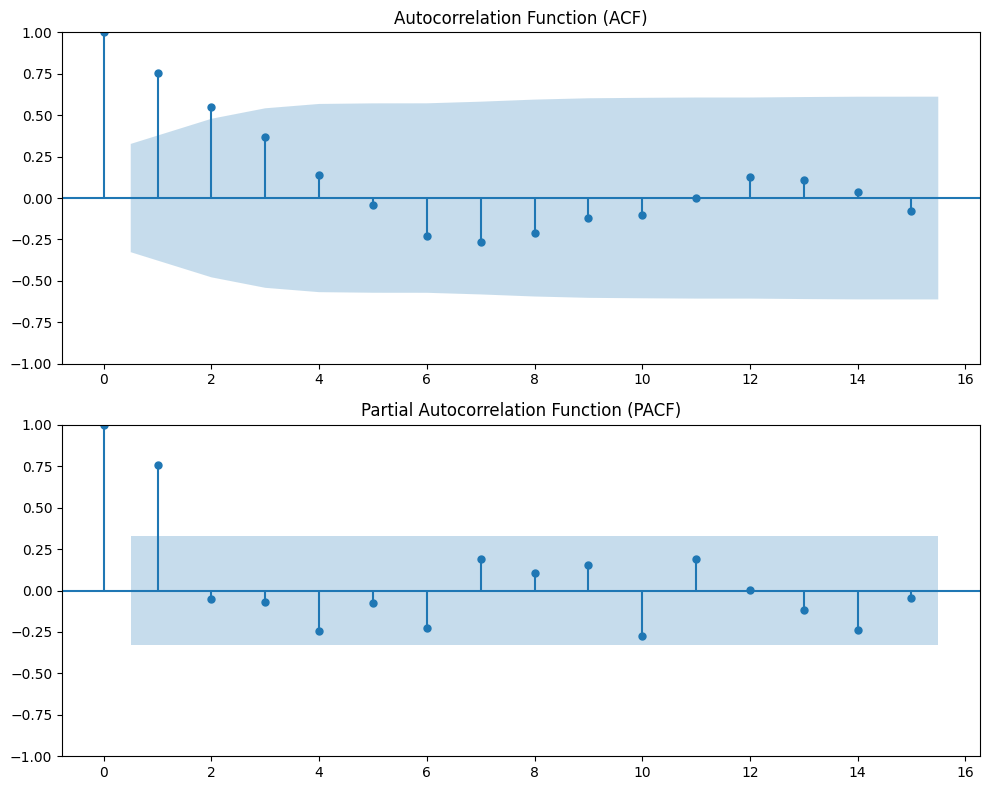

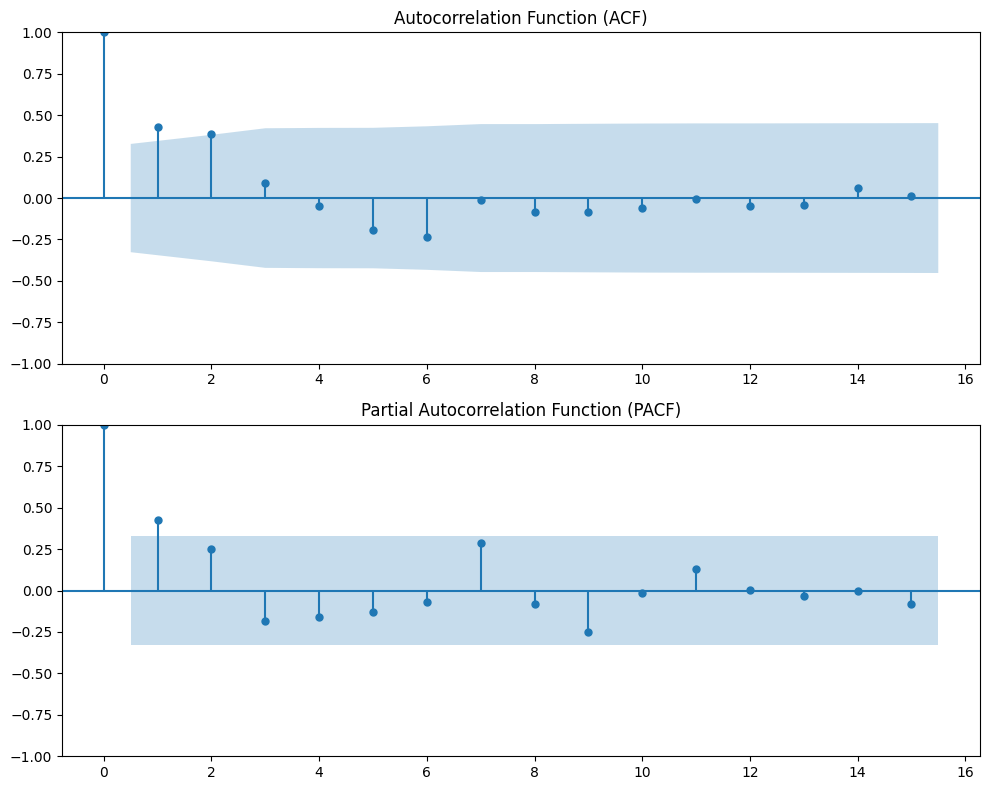

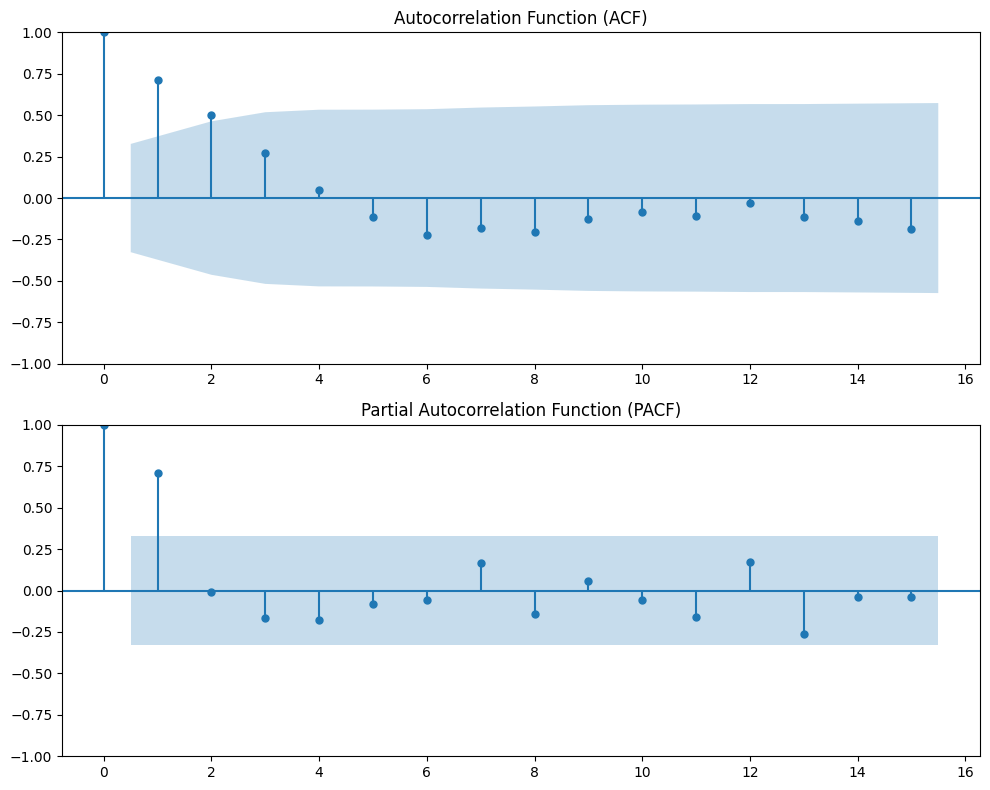

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


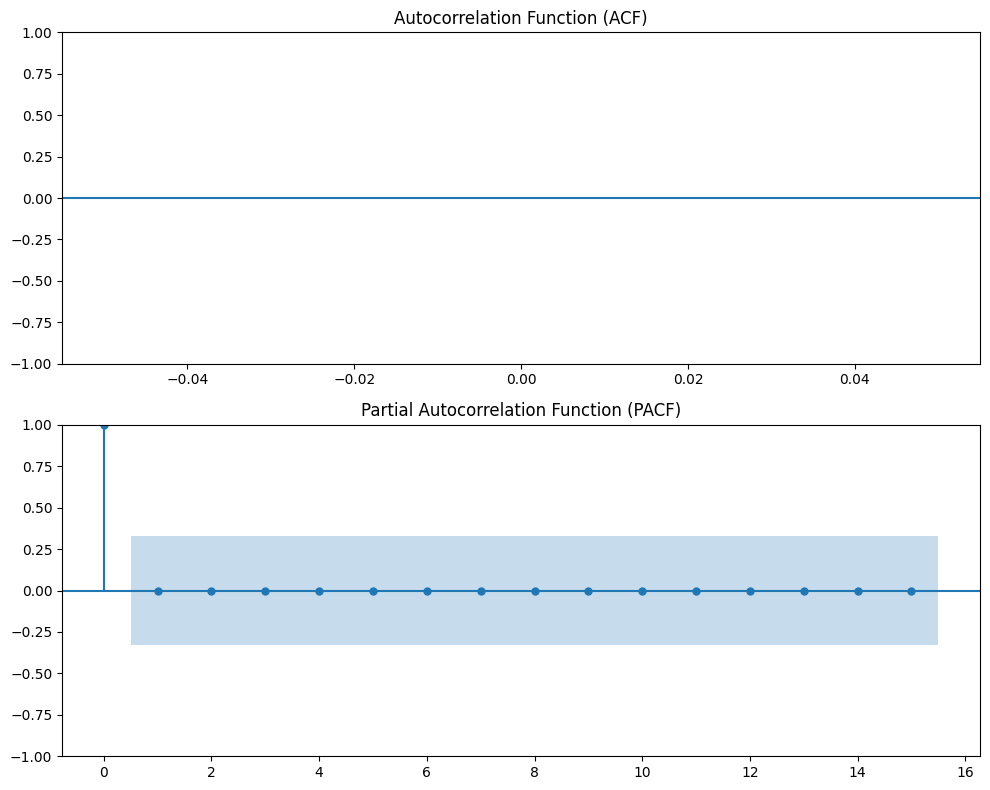

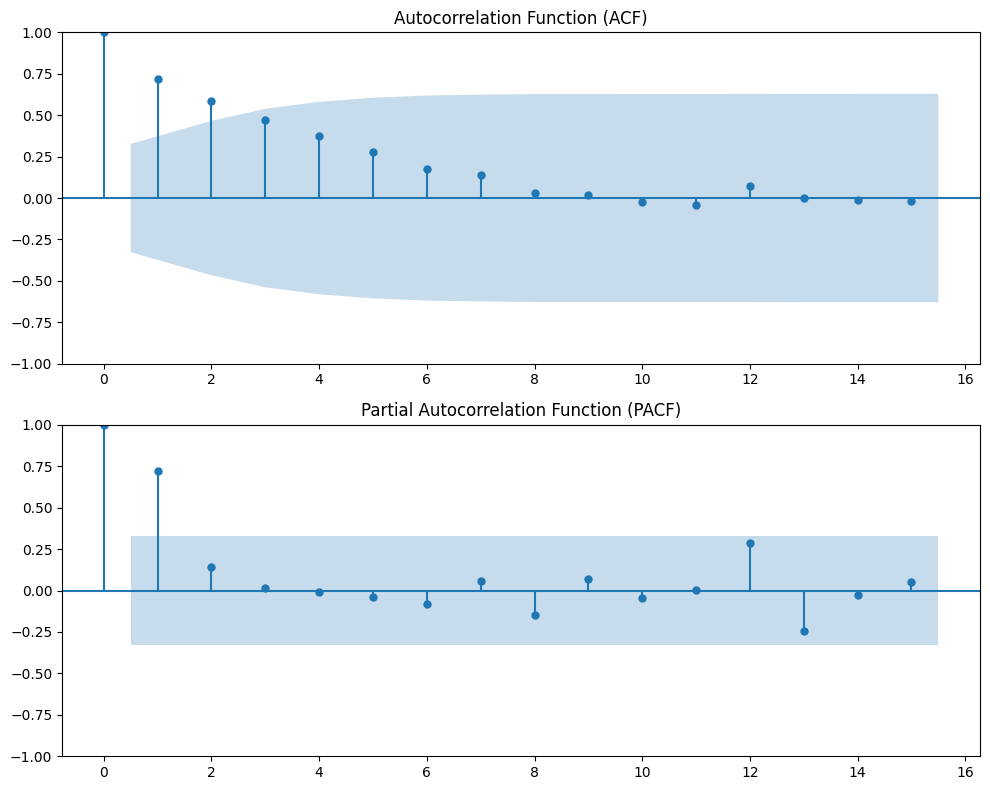

In [155]:
# Convierte la columna de fechas a formato de fecha
df2['mes'] = pd.to_datetime(df2['mes'])

def plot_acf_pacf(data, lags=15):
    # Crea subplots para los gráficos ACF y PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df2.set_index('mes', inplace=True)

# Visualización de gráficos ACF y PACF para cada serie de tiempo
plot_acf_pacf(df2['Diesel bajo azufre'])
plot_acf_pacf(df2['Diesel ultra bajo azufre'])
plot_acf_pacf(df2['Gasolina superior'])
plot_acf_pacf(df2['Diesel alto azufre'])
plot_acf_pacf(df2['Gasolina regular'])

#### Haciendo una predicción de las importaciones de las gasolinas y el gas.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sebas\AppData\Local

2022-05-01    9.190066e+05
2022-06-01    1.029920e+06
2022-07-01    9.814205e+05
2022-08-01    1.142971e+06
2022-09-01    1.170942e+06
2022-10-01    1.334259e+06
2022-11-01    1.388060e+06
2022-12-01    1.526404e+06
Freq: MS, Name: predicted_mean, dtype: float64


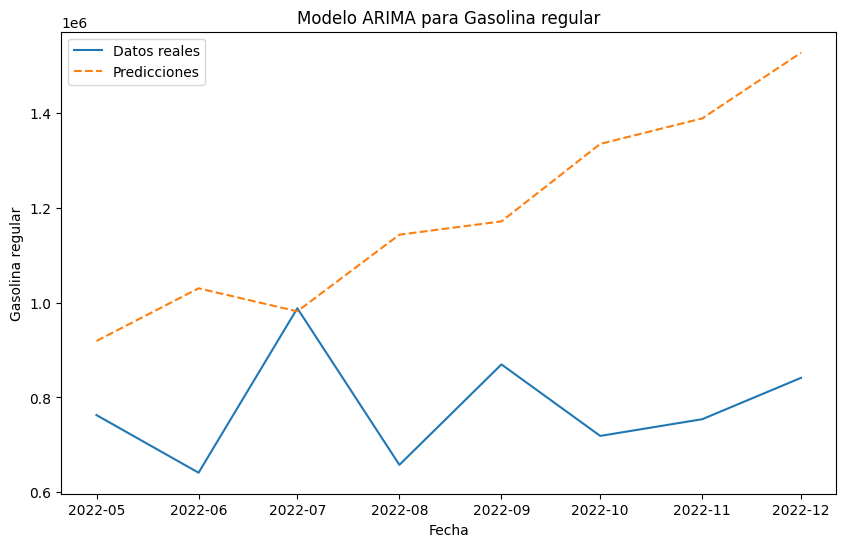

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    348602.634740
2022-06-01    146453.258390
2022-07-01    103380.666132
2022-08-01    -99648.713575
2022-09-01   -272878.684488
2022-10-01   -366610.041278
2022-11-01   -552090.741563
2022-12-01   -751089.050263
Freq: MS, Name: predicted_mean, dtype: float64


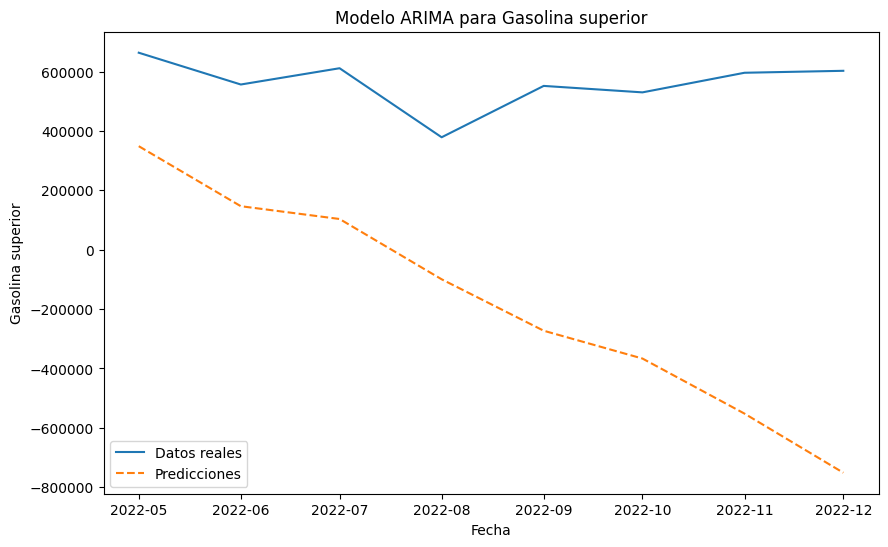

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    348602.634740
2022-06-01    146453.258390
2022-07-01    103380.666132
2022-08-01    -99648.713575
2022-09-01   -272878.684488
2022-10-01   -366610.041278
2022-11-01   -552090.741563
2022-12-01   -751089.050263
Freq: MS, Name: predicted_mean, dtype: float64


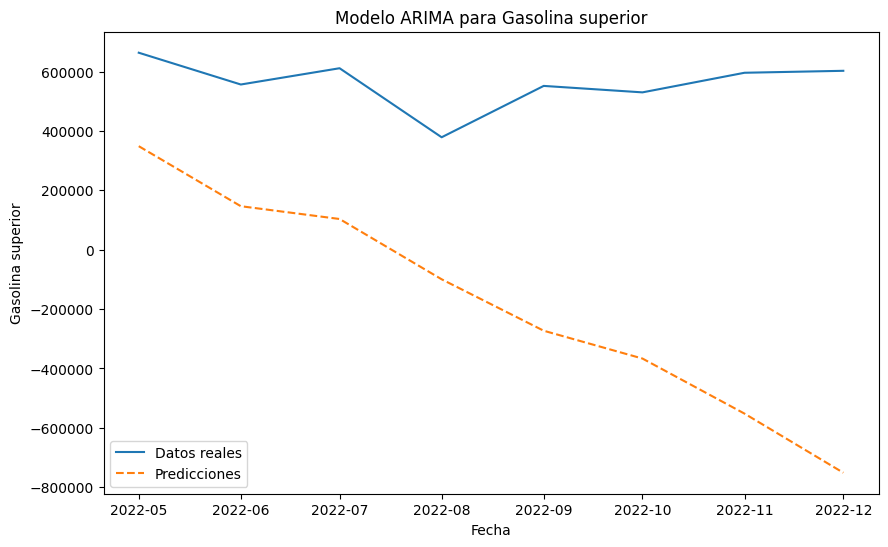

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    1.356351e+06
2022-06-01    1.293180e+06
2022-07-01    1.400721e+06
2022-08-01    1.337577e+06
2022-09-01    1.447684e+06
2022-10-01    1.416116e+06
2022-11-01    1.515995e+06
2022-12-01    1.521907e+06
Freq: MS, Name: predicted_mean, dtype: float64


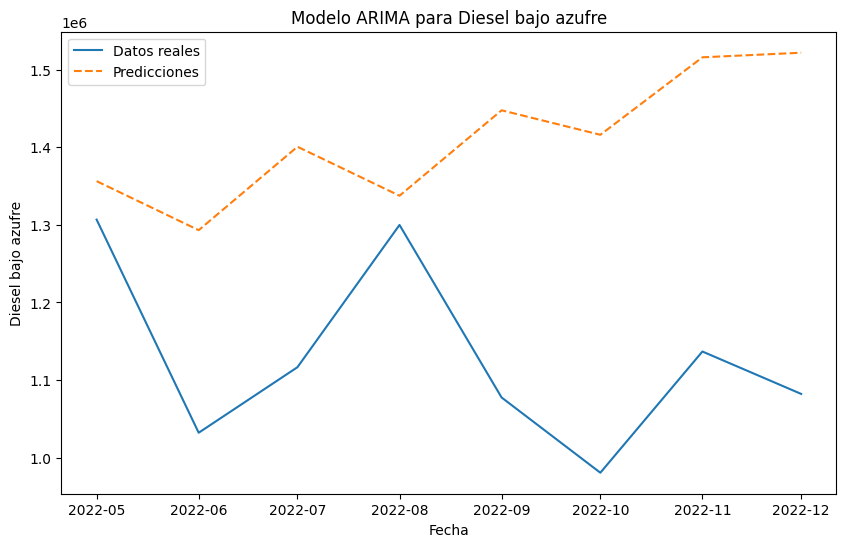

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    12982.839886
2022-06-01     9257.357635
2022-07-01     9358.635006
2022-08-01    12241.104913
2022-09-01     9404.778962
2022-10-01    12005.136514
2022-11-01    11262.419454
2022-12-01    11435.470611
Freq: MS, Name: predicted_mean, dtype: float64


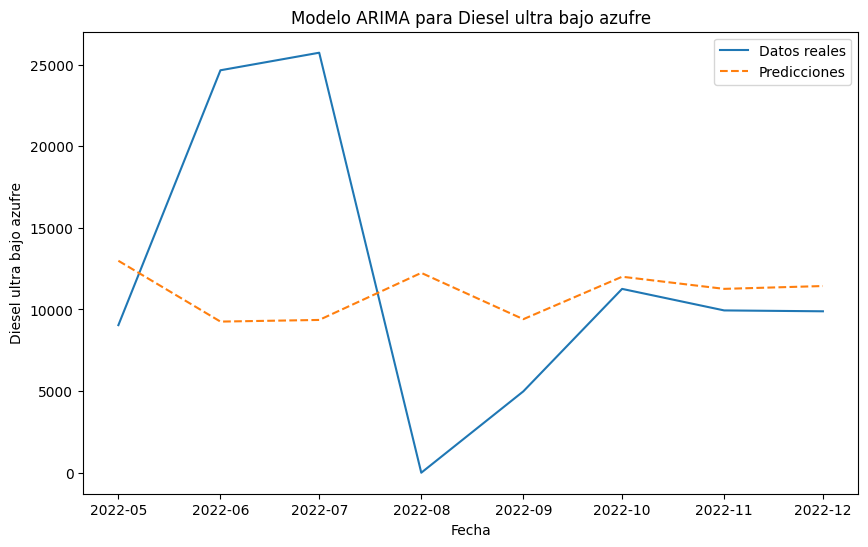

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-05-01    0.0
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
Freq: MS, Name: predicted_mean, dtype: float64


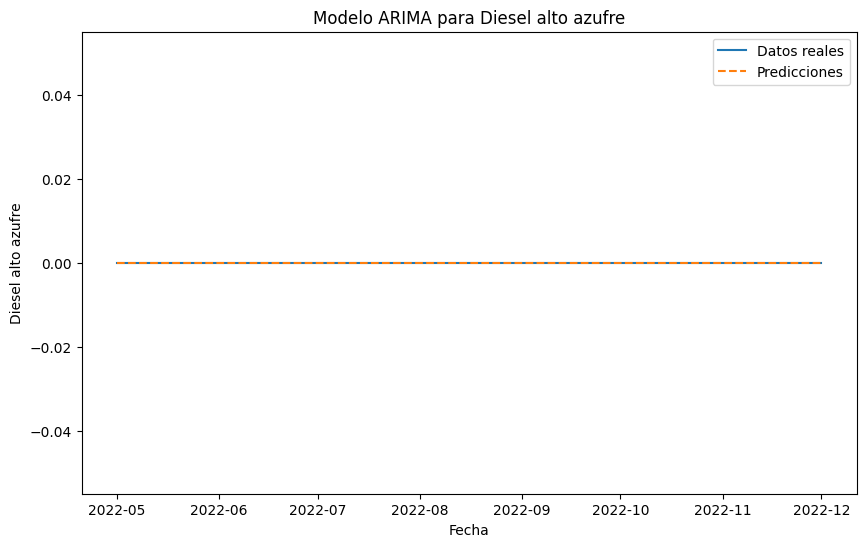

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sebas\AppData\Local

2022-05-01    8.201015e+05
2022-06-01    7.632159e+05
2022-07-01    9.289539e+05
2022-08-01    8.760911e+05
2022-09-01    1.048164e+06
2022-10-01    1.024717e+06
2022-11-01    1.185136e+06
2022-12-01    1.202464e+06
Freq: MS, Name: predicted_mean, dtype: float64


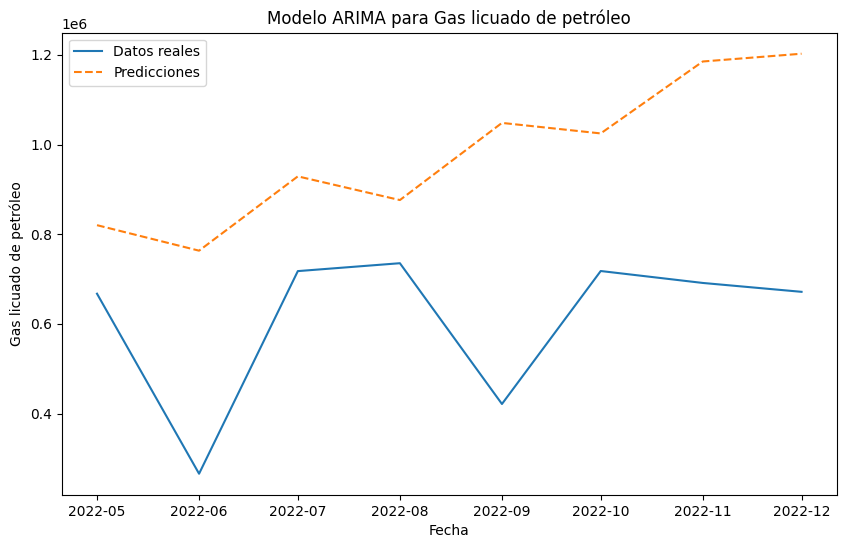

In [156]:
# Convierte la columna de fechas a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (4, 4, 4)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)


# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Haciendo las predicciones de consumo de las mismas variables.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    804042.436472
2022-06-01    774739.672184
2022-07-01    767814.097079
2022-08-01    764868.232755
2022-09-01    773624.631664
2022-10-01    784387.186759
2022-11-01    800851.903484
2022-12-01    803489.747898
Freq: MS, Name: predicted_mean, dtype: float64


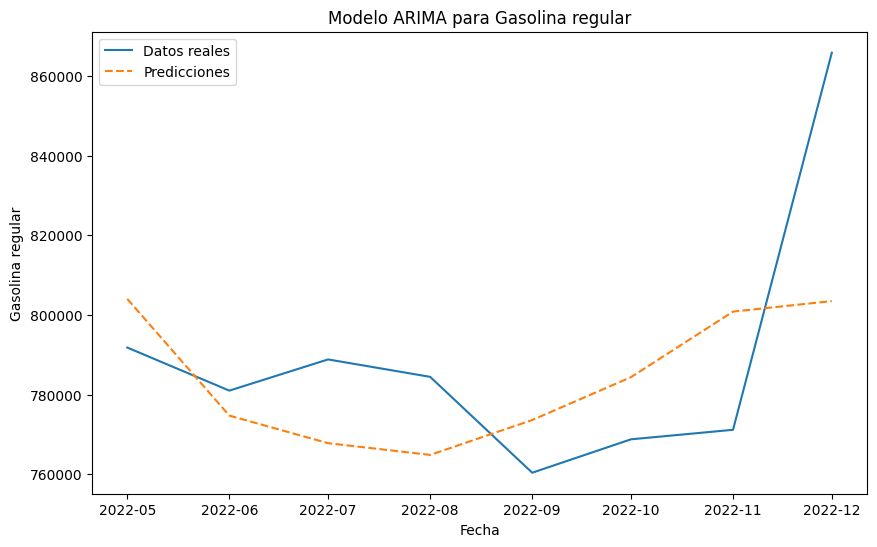

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-05-01    552913.953637
2022-06-01    541641.272052
2022-07-01    537252.456774
2022-08-01    538514.127518
2022-09-01    544571.753009
2022-10-01    554181.282951
2022-11-01    566070.005118
2022-12-01    578982.029217
Freq: MS, Name: predicted_mean, dtype: float64


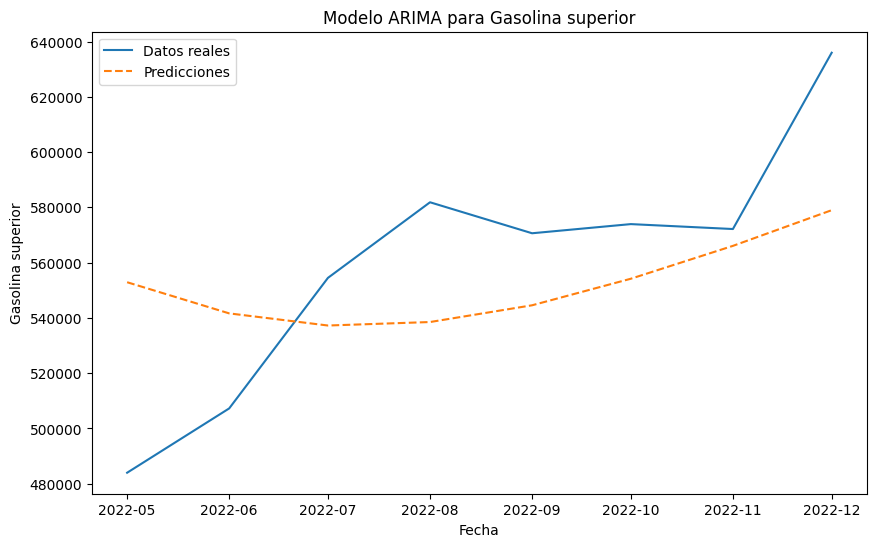

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\se

2022-05-01    1.181289e+06
2022-06-01    1.127451e+06
2022-07-01    1.157154e+06
2022-08-01    1.102668e+06
2022-09-01    1.114704e+06
2022-10-01    9.773602e+05
2022-11-01    1.039139e+06
2022-12-01    1.160287e+06
Freq: MS, Name: predicted_mean, dtype: float64


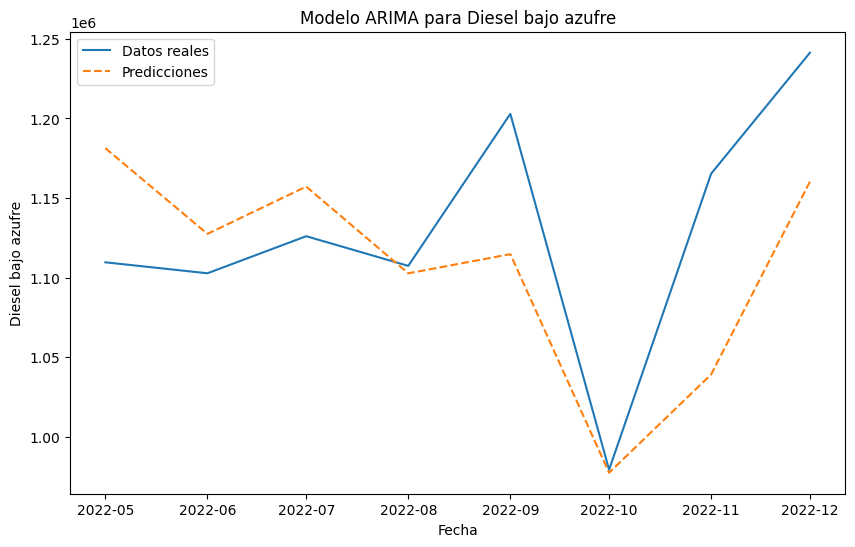

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    9644.082095
2022-06-01    9644.082095
2022-07-01    9644.082095
2022-08-01    9644.082095
2022-09-01    9644.082095
2022-10-01    9644.082095
2022-11-01    9644.082095
2022-12-01    9644.082095
Freq: MS, Name: predicted_mean, dtype: float64


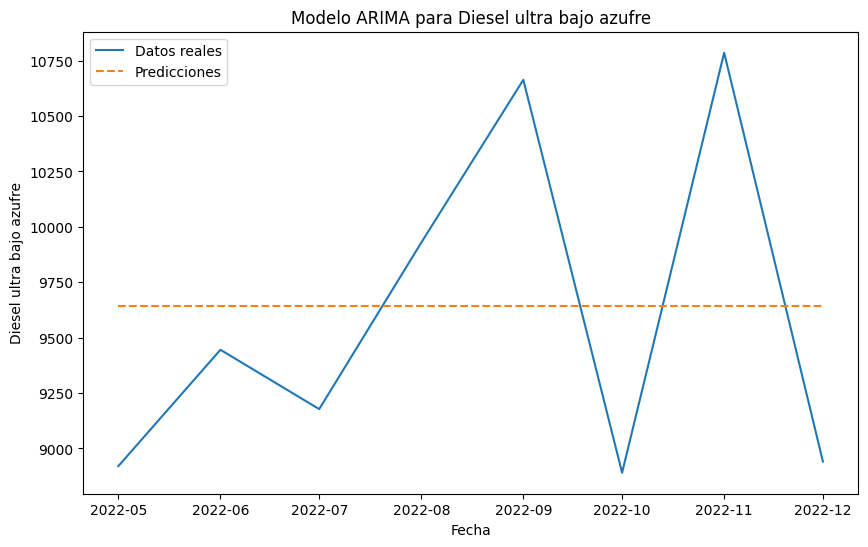

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2022-05-01    0.0
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
Freq: MS, Name: predicted_mean, dtype: float64


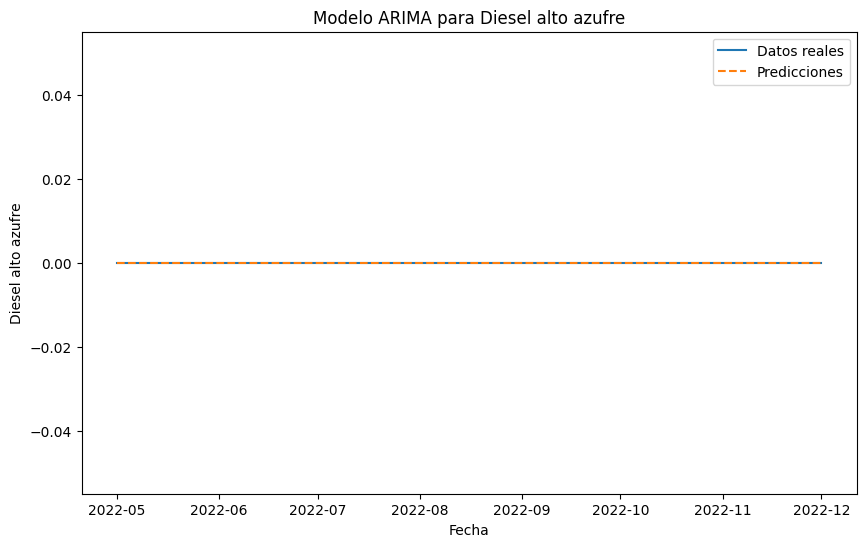

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-05-01    506639.641250
2022-06-01    513875.185778
2022-07-01    525403.965323
2022-08-01    526631.014423
2022-09-01    532535.575208
2022-10-01    534354.018394
2022-11-01    538926.275789
2022-12-01    543498.533183
Freq: MS, Name: predicted_mean, dtype: float64


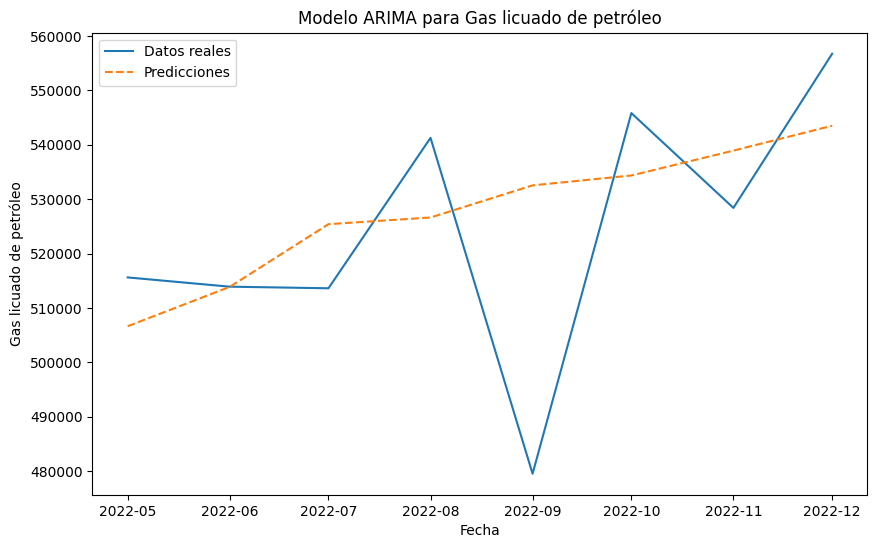

In [157]:
# warnings.filterwarnings("ignore", message="No frequency information was provided")

# # Desactivar los mensajes de información y advertencia de statsmodels
# warnings.filterwarnings("ignore", message=".*Starting MA parameters.*", category=UserWarning)
# warnings.filterwarnings("ignore", message=".*Non-stationary starting autoregressive parameters.*", category=UserWarning)
# warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed.*", category=ConvergenceWarning)
# warnings.filterwarnings("ignore", message=".*Maximum Likelihood optimization failed to converge. Check mle_retvals.*", category=ConvergenceWarning)

# # Convierte la columna de fechas a formato de fecha
# df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# # Convierte la columna de fechas a índice para trabajar con series de tiempo
# df2.set_index('Fecha', inplace=True)

# def find_best_arima_order(variable_interes, p_values, d_values, q_values):
#     best_mse = float('inf')
#     best_order = None

#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p, d, q)
#                 train_size = int(len(df2) * 0.8)
#                 train_data = df2[variable_interes][:train_size]
#                 test_data = df2[variable_interes][train_size:]
#                 try:
#                     model = ARIMA(train_data, order=order)
#                     model_fit = model.fit()
#                     predictions = model_fit.forecast(steps=len(test_data))
#                     mse = mean_squared_error(test_data, predictions)
#                     if mse < best_mse:
#                         best_mse = mse
#                         best_order = order
#                 except:
#                     continue

#     return best_order, best_mse

# # Valores posibles para p, d, q
# p_values = range(10)
# d_values = range(10)
# q_values = range(10)

# # Usando la gasolina regular.
# variable_interes = 'Gasolina regular'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))

# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando la gasolina super.
# variable_interes = 'Gasolina superior'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Diesel bajo azufre.
# variable_interes = 'Diesel bajo azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Diesel ultra bajo de azufre.
# variable_interes = 'Diesel ultra bajo azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el diesel alto azufre.
# variable_interes = 'Diesel alto azufre'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# # Usando el Gas Licuado de petróleo.
# variable_interes = 'Gas licuado de petróleo'
# best_order, best_mse = find_best_arima_order(variable_interes, p_values, d_values, q_values)
# print(f"Mejor orden para {variable_interes}: {best_order}, MSE: {best_mse}")

# # Ajustar el modelo ARIMA con el mejor orden a los datos de entrenamiento
# train_size = int(len(df2) * 0.8)
# train_data = df2[variable_interes][:train_size]
# test_data = df2[variable_interes][train_size:]
# model = ARIMA(train_data, order=best_order)
# model_fit = model.fit()

# # Hacer predicciones para los datos de prueba
# predictions = model_fit.forecast(steps=len(test_data))
# print("Predicción: ", predictions)

# # Graficar las predicciones y los datos reales
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index[train_size:], test_data, label='Datos reales')
# plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
# plt.xlabel('Fecha')
# plt.ylabel(variable_interes)
# plt.legend()
# plt.title(f'Modelo ARIMA para {variable_interes} con orden {best_order}')
# plt.show()

# Convierte la columna de fechas a formato de fecha
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df2.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (7,1,1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)


# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 0, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (8, 2, 5)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 1)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 1, 0)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df2) * 0.8)
train_data = df2[variable_interes][:train_size]
test_data = df2[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (0, 2, 7)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Imprimiendo las predicciones.
print(predictions)

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df2.index[train_size:], test_data, label='Datos reales')
plt.plot(df2.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

### Inciso 3: Usando las series seleccionadas.

#### a. Especifique Inicio, fin, y frecuencia.

In [158]:

"""
Gasolina regular 
Gasolina superior 
Diesel bajo azufre 
Diesel ultra bajo azufre 
Diesel alto azufre 
Gas licuado 
"""
# Obtener el inicio de la serie
inicio = df2.index.min()

print('Inicio de la serie:', inicio)

# Obtener el fin de la serie
fin = df2.index.max()
print('Fin de la serie:', fin)

# Calcular las diferencias entre las fechas
diferencias = df2.index.to_series().diff().dt.days

# Encontrar el valor más común
frecuencia = diferencias.value_counts().idxmax()

print("Frecuencia: ", frecuencia)

Inicio de la serie: 2020-01-01 00:00:00
Fin de la serie: 2022-12-01 00:00:00
Frecuencia:  31.0


#### b. Haga  un  gráfico  de  la  serie  y  explique  qué  información  puede  obtener  a  primera vista.

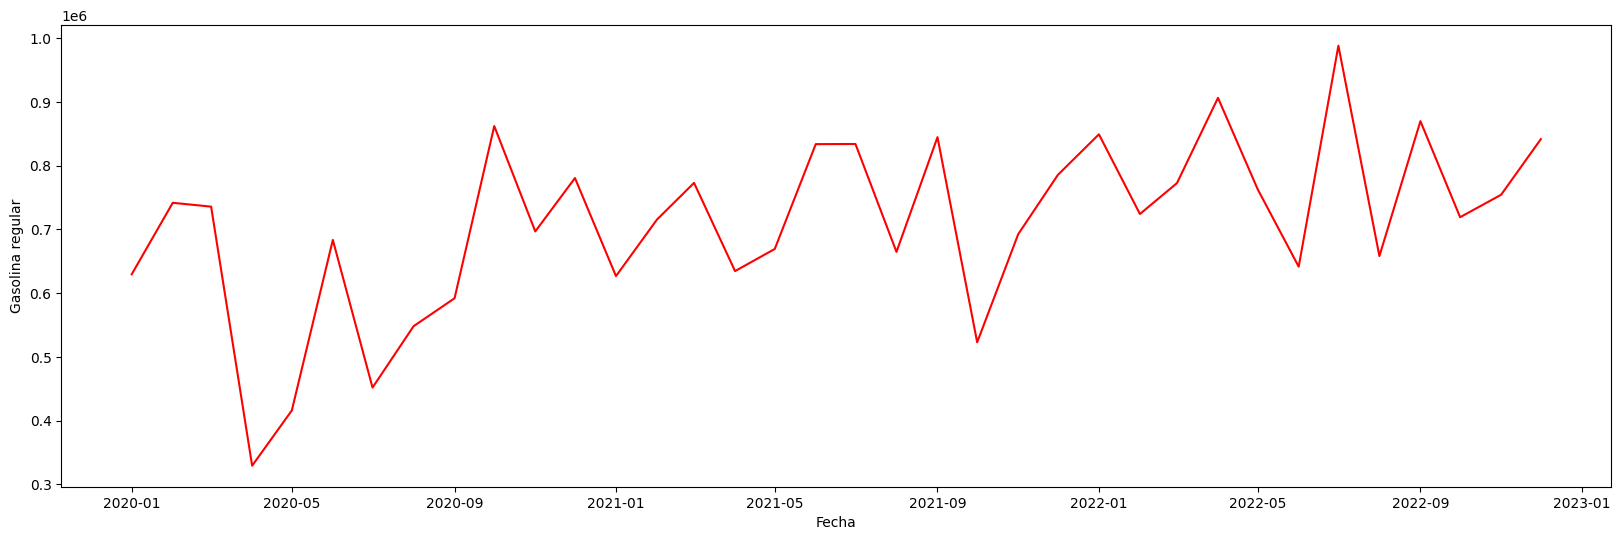

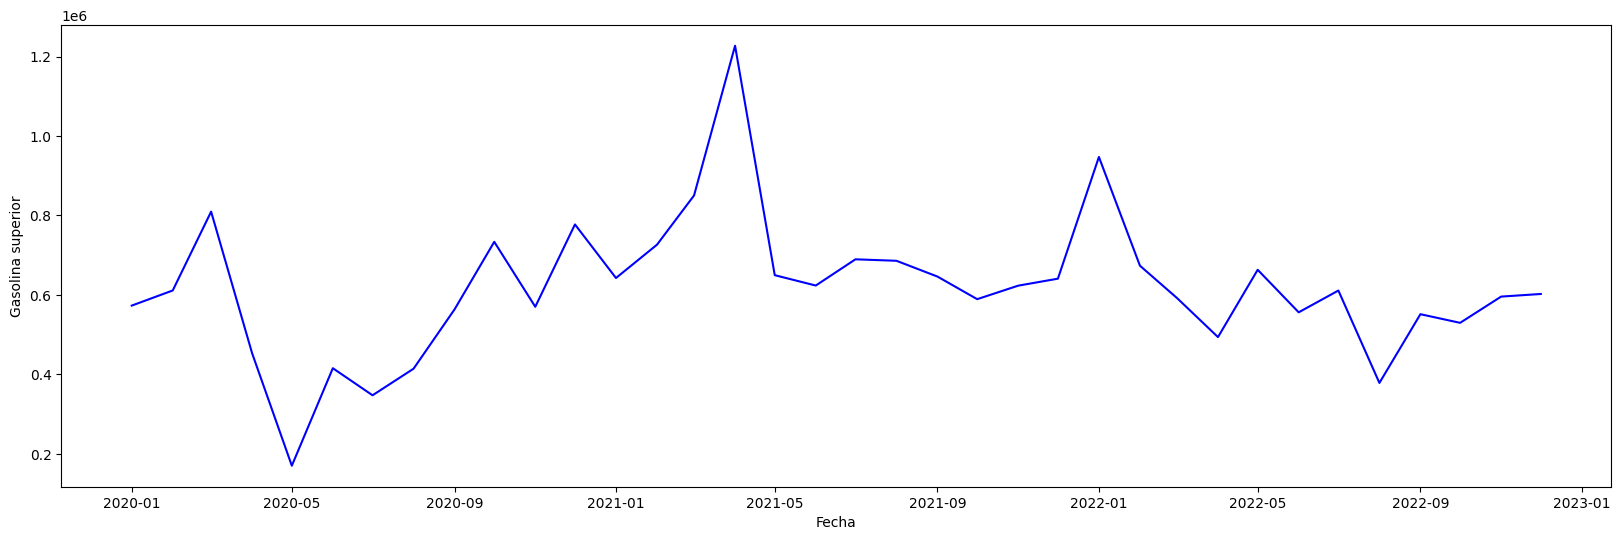

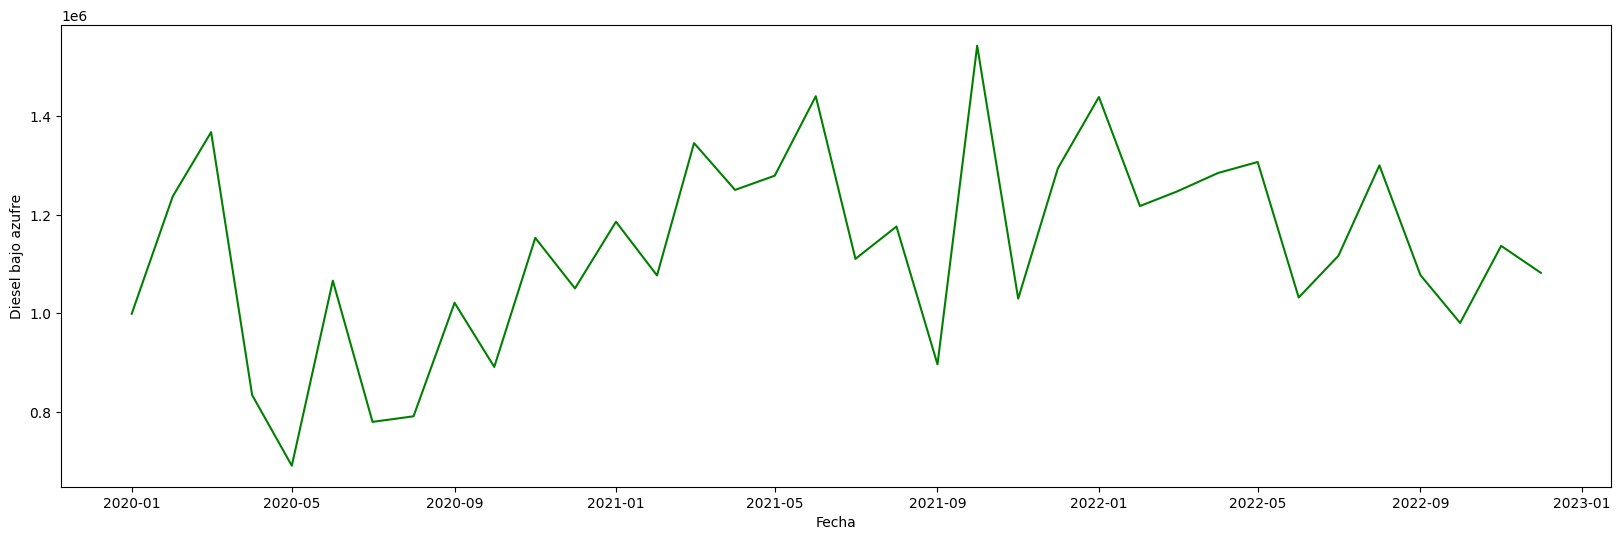

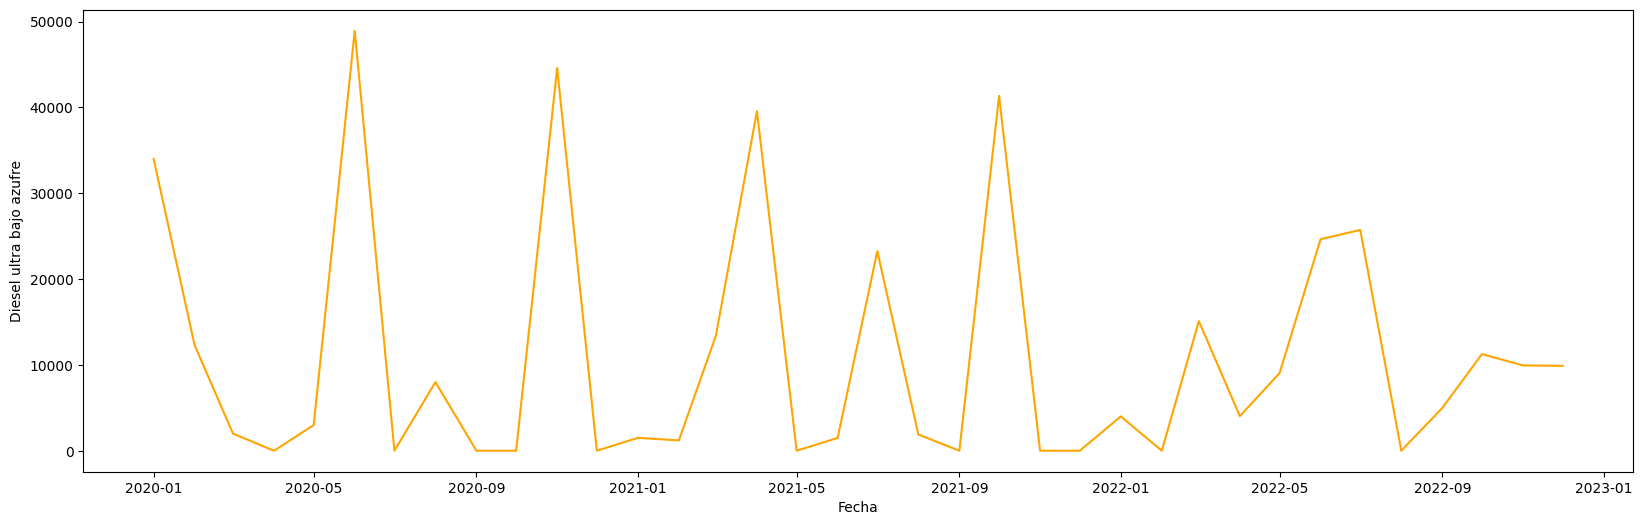

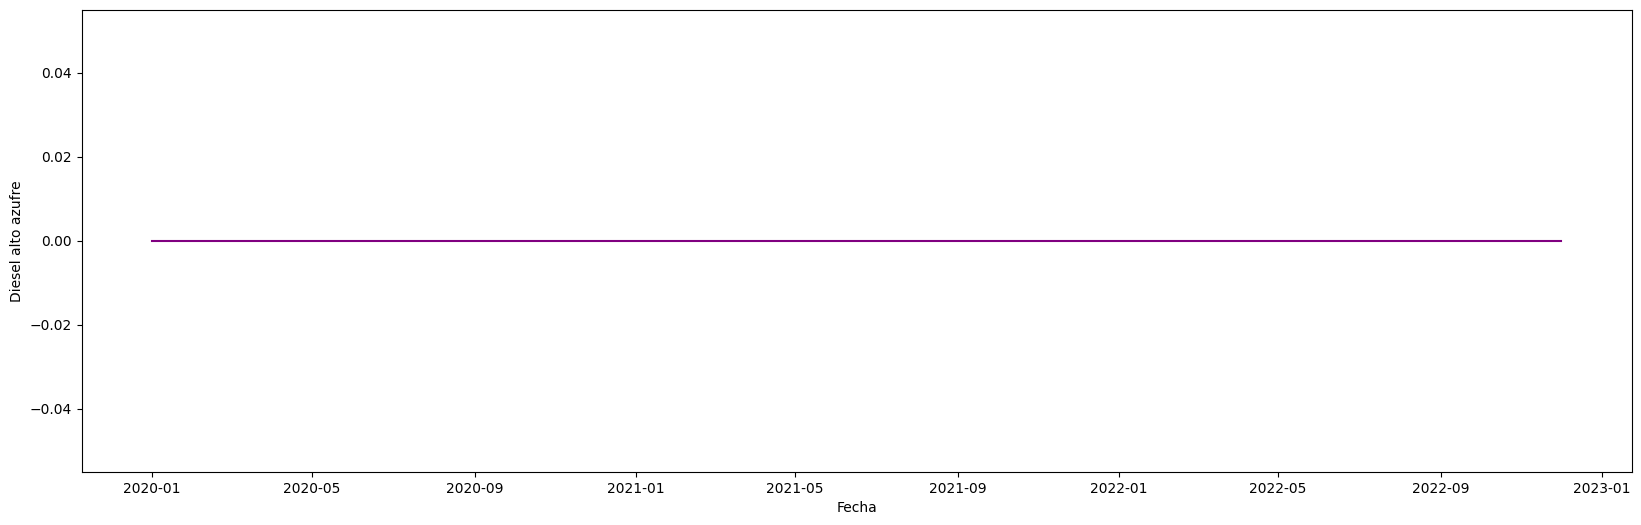

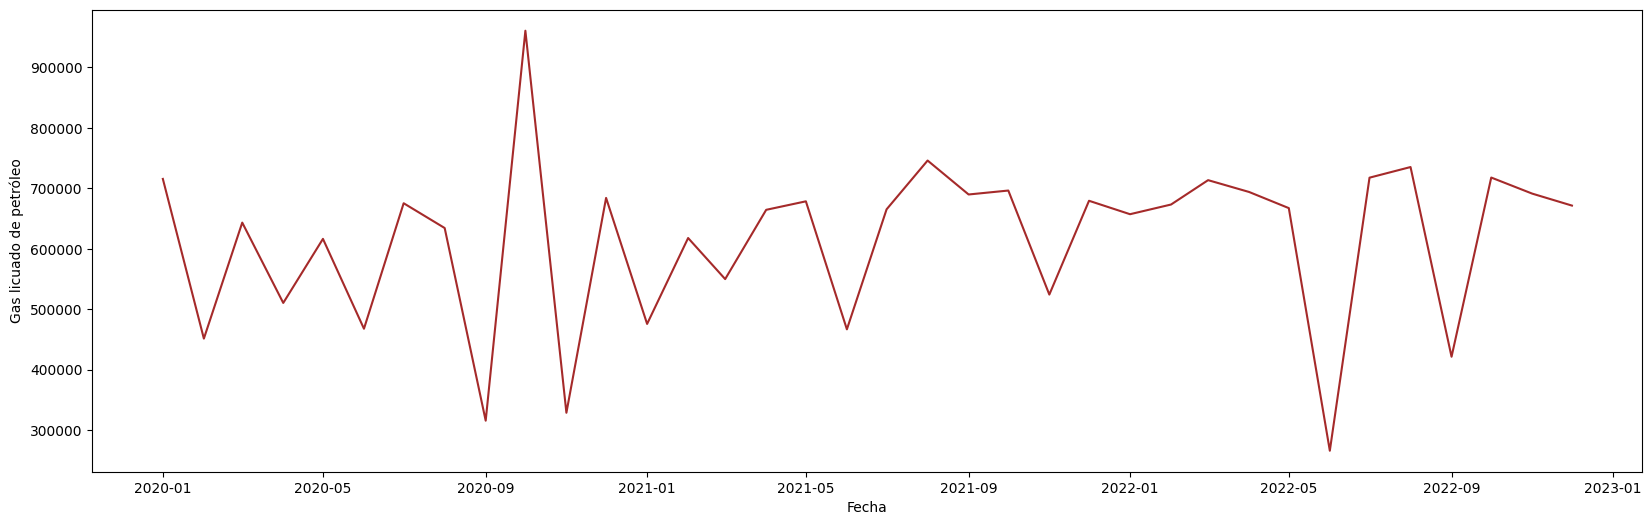

In [159]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado
"""

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para la gasolina regular.
plt.plot(df.index, df["Gasolina regular"], color='red')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gasolina regular')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para la Gasolina superior.
plt.plot(df.index, df["Gasolina superior"], color='blue')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gasolina superior')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel bajo azufre.
plt.plot(df.index, df["Diesel bajo azufre"], color='green')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel bajo azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel ultra bajo azufre.
plt.plot(df.index, df["Diesel ultra bajo azufre"], color='orange')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel ultra bajo azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Diesel alto azufre.
plt.plot(df.index, df["Diesel alto azufre"], color='purple')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Diesel alto azufre')

plt.show()

plt.figure(figsize=(20, 6))

# Creando un gráfico de líneas para el Gas licuado de petróleo.
plt.plot(df.index, df["Gas licuado de petróleo"], color='brown')

# Dando etiquetas a la gráfica
plt.xlabel('Fecha')
plt.ylabel('Gas licuado de petróleo')

plt.show()

##### Se puede notar, que al observar el consumo de las diferentes gasolinas entre los años 2020 y 2023 tienen diferentes comportamientos. Con lo anterior mencionado se puede decir que han habido meses en los que el consumo de las gasolinas es muy alto o muy bajo. También se puede notar que hay gasolinas más consumidas que otras. Finalmente, cabe destacar que el diesel alto en azufre no se consume en lo absoluto en Guatemala.

#### c. Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionariedad en media y en varianza.

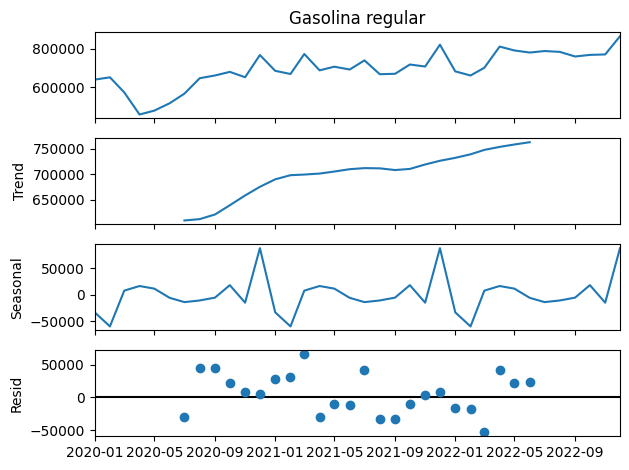

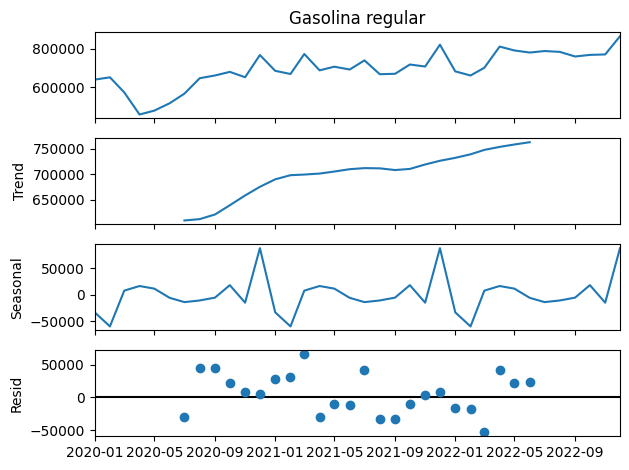

In [167]:
"""
Gasolina regular
Gasolina superior
Diesel bajo azufre
Diesel ultra bajo azufre
Diesel alto azufre
Gas licuado
"""

# Descomponer la serie de tiempo de la Gasolina regular.
decomposition = sm.tsa.seasonal_decompose(df2["Gasolina regular"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### De este modelo de tiempo se puede decir que existe una tendencia por más consumo de gasolina regular. Con esto se podría decir que existe una gran posiblidad de que haya un aumento de motos dentro de la ciudad capital. Por otro lado, se puede notar que existen meses en los cuales la media de consumo disminuye bastante, mientras que en otros meses regresa a su pico más alto de consumo. Finalmente, es importante mencionar que no existe tanto sesgo dentro de esta serie de tiempo, por lo que se podría decir que es bastante exacta para realizar predicciones en base a los patrones que ya tiene.

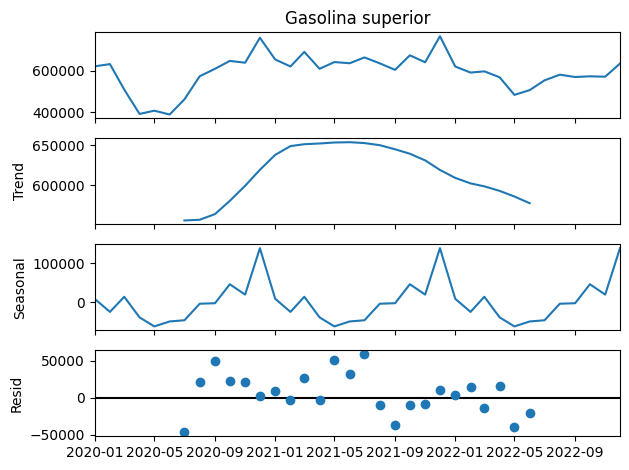

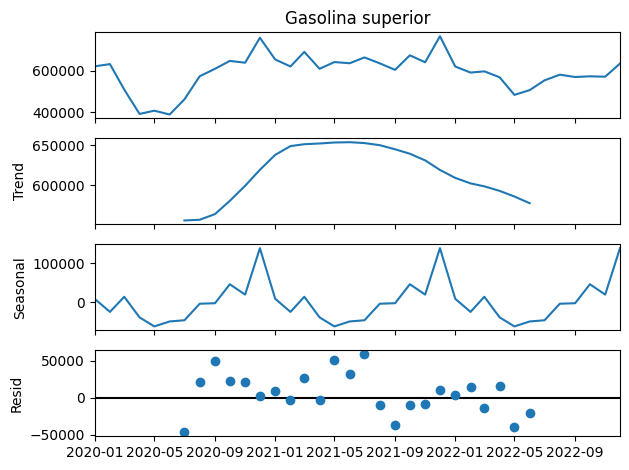

In [161]:
# Descomponer la serie de tiempo de la Gasolina superior.
decomposition = sm.tsa.seasonal_decompose(df2["Gasolina superior"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### En principio, se puede notar que para esta serie de tiempo, la tendencia fue bastante buena, pero se pudo notar que luego bajó considerablemente. Lo anterior se puede deber a que hubo algunos meses de "depresión" de consumo, por el aumento del costo de la gasolina superior. Asimismo, se puede notar que hubo meses en donde la media de consumo fue bastante alta, mientras que en otros meses la media de consumo fue bastante deficiente y baja. Finalmente, cabe destacar que en esta serie de tiempo existe bastante sesgo entre algunos datos del set de datos. 

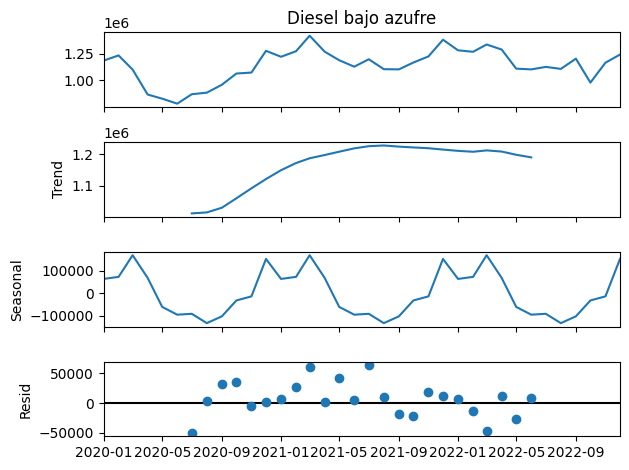

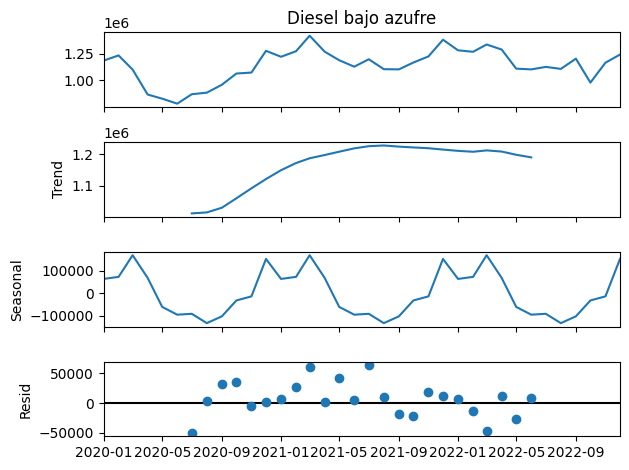

In [162]:
# Descomponer la serie de tiempo del Diesel bajo azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel bajo azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### En esta serie de tiempo se puede notar que el diesel bajo azufre tuvo bastante aceptación por parte de los consumidoeres. Se puede notar que tuvo un pequeño bajón de consumo, sin embargo, aún se mantuvo con bastante aceptación en el mercado. Por otro lado, se puede notar que en algunos meses, el consumo de este producto bajó, pero aún así lograba recuperarse de esas pequeñas "depresiones". Por último, es importante mencionar que los datos no variaron tanto de una época a otra, a pesar de que hubo bajones de consumo en distintos meses.

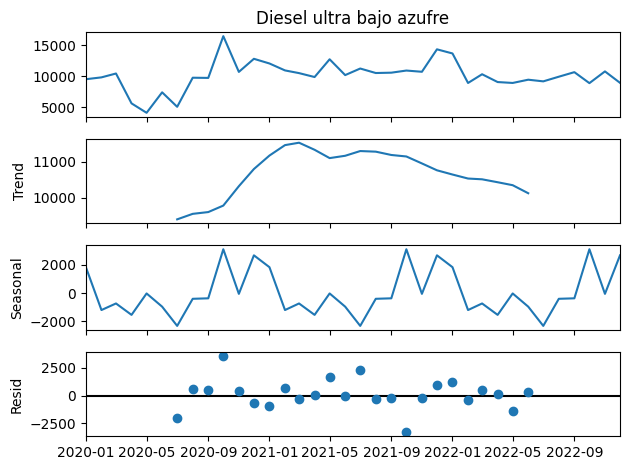

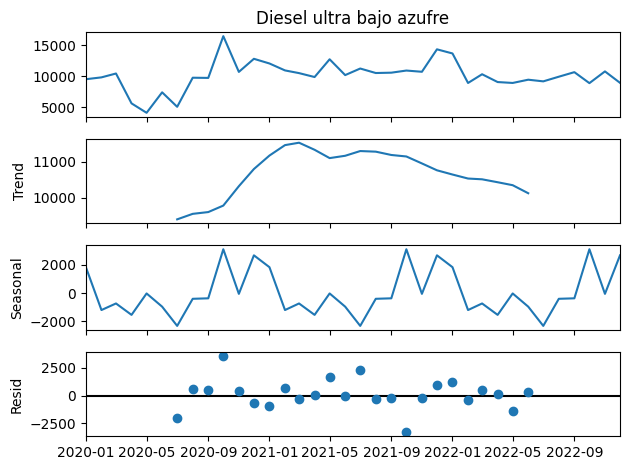

In [163]:
# Descomponer la serie de tiempo del Diesel bajo azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel ultra bajo azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### En este tipo de combustible se puede notar que el pico de aceptación o tendencia de este tipo de gasolina fue alto en algún momento, pero se puede notar que rápidamente bajó. Lo anterior podría significar que este producto no fue tan aceptado por muchas personas en el mercado. También se puede notar que este producto tuvo varios meses en los que fue bastante consumido, a pesear de su poca aceptación en el mercado. Por otro lado, es importante mencionar que los consumos de un mes a otro no variaron tanto, lo que quiere decir que su consumo se mantuvo constante.

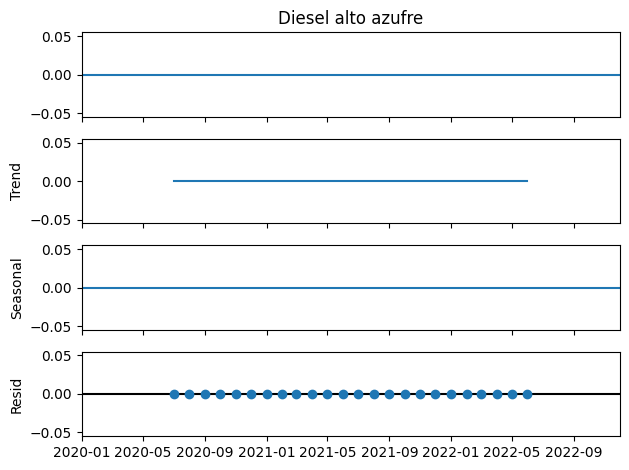

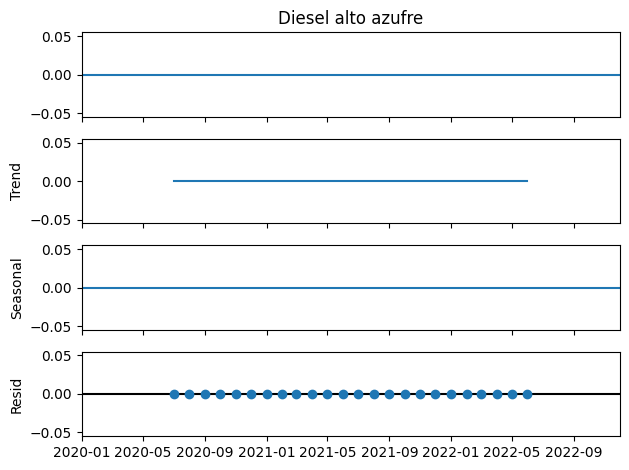

In [164]:
# Descomponer la serie de tiempo del Diesel alto azufre.
decomposition = sm.tsa.seasonal_decompose(df2["Diesel alto azufre"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot()

#### Se puede notar que para este producto, o sea el Diesel alto azufre, no fue aceptado ni consumido por el mercado Guatemalteco de gasolinas.

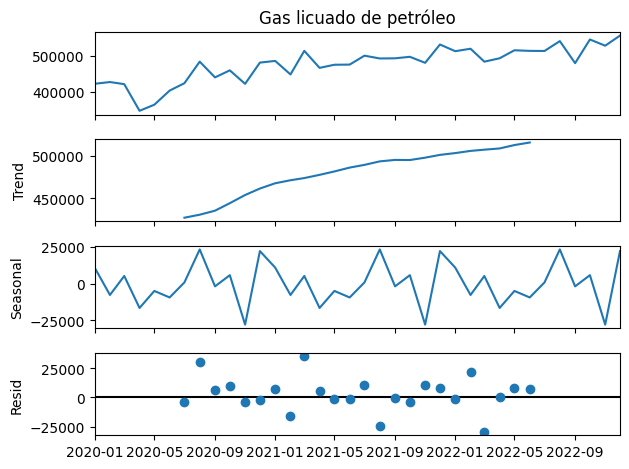

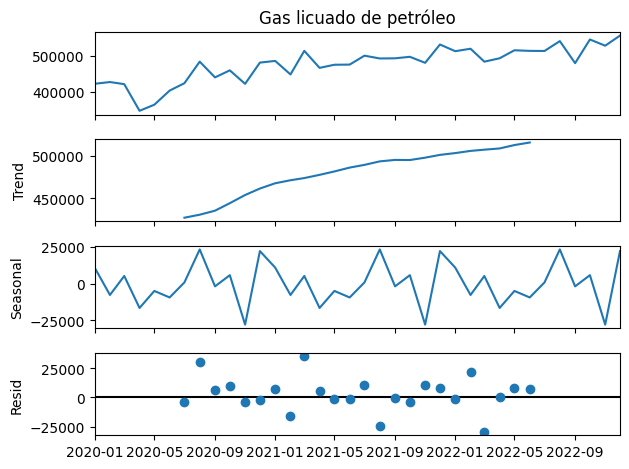

In [165]:
# Gas licuado de petróleo

# Descomponer la serie de tiempo del Gas licuado de petróleo.
decomposition = sm.tsa.seasonal_decompose(df2["Gas licuado de petróleo"], model='additive')

# Obtener los componentes de la descomposición
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
residuo = decomposition.resid

# Visualizar los componentes de la descomposición
decomposition.plot() 

#### Se puede notar que este producto, gas licuado de petróleo, fue bastante bien aceptado dentro del mercado de gas en Guatemala. También es importante mencionar que hubo pocos meses en donde su consumo bajó drásticamente, lo cual es bueno. También es importante mencionar que la varianza nos da un indicio positivo de que el consumo de este producto fue bastante bueno y aceptado.